<a href="https://colab.research.google.com/github/BhavdeepSinghNijhawan/Machine-Learning-for-Enhanced-Cybersecurity-Solutions/blob/main/Generative_Adversarial_Network_(GANs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision numpy opencv-python matplotlib cryptography

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch
import torchvision
import numpy as np
import cv2
import matplotlib.pyplot as plt
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes

print("All libraries loaded successfully!")

All libraries loaded successfully!


100%|██████████| 170M/170M [00:13<00:00, 12.5MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


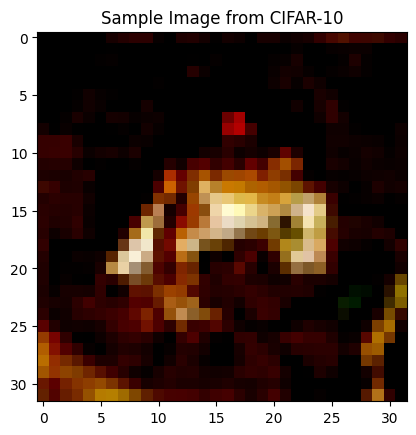

In [ ]:
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader

# Define transformations (normalize and convert to tensors)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load CIFAR-10 dataset
dataset = CIFAR10(root='./data', train=True, download=True, transform=transform)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Show a sample image
sample_image, _ = dataset[0]
plt.imshow(sample_image.permute(1, 2, 0))  # Convert CHW to HWC for visualization
plt.title("Sample Image from CIFAR-10")
plt.show()

In [ ]:
!pip install pqcrypto

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 41.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pqcrypto: filename=pqcrypto-0.1.3-cp311-cp311-manylinux_2_35_x86_64.whl size=38989 sha256=380bb61d67bcdb115fc9ff859110cc1f99079e43afc07386bcbe5c97013f8696
  Stored in directory: /root/.cache/pip/wheels/fa/dc/d9/40ea378020b3a33e7c3d8907f61e2696b8a128f547d3e9abb1
Successfully built pqcrypto


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),  # Input Image
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 3, kernel_size=3, stride=1, padding=1),  # Output "Encrypted" Image
            nn.Tanh()
        )

    def forward(self, x):
        return self.main(x)

generator = Generator()
print(generator)

Generator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(128, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): Tanh()
  )
)


In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Flatten(),
            nn.Linear(128 * 32 * 32, 1),  # CIFAR-10 images are 32x32
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.main(x)

discriminator = Discriminator()
print(discriminator)

Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.2)
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): LeakyReLU(negative_slope=0.2)
    (4): Flatten(start_dim=1, end_dim=-1)
    (5): Linear(in_features=131072, out_features=1, bias=True)
    (6): Sigmoid()
  )
)


In [ ]:
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss

# Optimizers
lr = 0.0002  # Learning Rate
generator_optimizer = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

In [ ]:
# Save Generator & Discriminator after each epoch
torch.save(generator.state_dict(), f"generator_epoch_{epoch+1}.pth")
torch.save(discriminator.state_dict(), f"discriminator_epoch_{epoch+1}.pth")

In [ ]:
import glob

# Find the latest checkpoint
generator_files = sorted(glob.glob("generator_epoch_*.pth"))
discriminator_files = sorted(glob.glob("discriminator_epoch_*.pth"))

if generator_files and discriminator_files:
    last_epoch = int(generator_files[-1].split("_")[-1].split(".")[0])

    generator.load_state_dict(torch.load(generator_files[-1]))
    discriminator.load_state_dict(torch.load(discriminator_files[-1]))

    print(f"Resuming training from Epoch {last_epoch+1}...")
else:
    last_epoch = 0  # If no checkpoint found, start from scratch
    print("No previous checkpoint found. Starting from scratch.")

In [ ]:
for epoch in range(last_epoch, num_epochs):  # Start from last saved epoch
    for i, (real_images, _) in enumerate(dataloader):
        real_images = real_images.to(device)

        # Train Discriminator
        discriminator_optimizer.zero_grad()
        real_outputs = discriminator(real_images).view(-1)
        real_loss = criterion(real_outputs, torch.full_like(real_outputs, real_label, device=device))

        fake_images = generator(real_images).detach()
        fake_outputs = discriminator(fake_images).view(-1)
        fake_loss = criterion(fake_outputs, torch.full_like(fake_outputs, fake_label, device=device))

        d_loss = real_loss + fake_loss
        d_loss.backward()
        discriminator_optimizer.step()

        # Train Generator
        generator_optimizer.zero_grad()
        fake_images = generator(real_images)
        fake_outputs = discriminator(fake_images).view(-1)
        g_loss = criterion(fake_outputs, torch.full_like(fake_outputs, real_label, device=device))

        g_loss.backward()
        generator_optimizer.step()

        if i % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i}/{len(dataloader)}], "
                  f"D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")

    # Save model again
    torch.save(generator.state_dict(), f"generator_epoch_{epoch+1}.pth")
    torch.save(discriminator.state_dict(), f"discriminator_epoch_{epoch+1}.pth")

print("Training Resumed & Completed!")

In [ ]:
function preventDisconnect() {
    document.querySelector("#connect").click();
}
setInterval(preventDisconnect, 60000);

In [ ]:
import glob

# List all saved models
generator_files = sorted(glob.glob("generator_epoch_*.pth"))
discriminator_files = sorted(glob.glob("discriminator_epoch_*.pth"))

print("Found Generator Checkpoints:", generator_files)
print("Found Discriminator Checkpoints:", discriminator_files)

In [ ]:
if generator_files and discriminator_files:
    # Find the highest available epoch
    last_epoch = max([int(f.split("_")[-1].split(".")[0]) for f in generator_files])

    # Load the latest checkpoint
    generator.load_state_dict(torch.load(f"generator_epoch_{last_epoch}.pth"))
    discriminator.load_state_dict(torch.load(f"discriminator_epoch_{last_epoch}.pth"))

    print(f"Resuming training from Epoch {last_epoch+1}...")
else:
    last_epoch = 0
    print("No checkpoint found. Starting from scratch.")

In [ ]:
import os

# Check if there are saved model files
model_files = [f for f in os.listdir() if f.endswith(".pth")]
print("Saved model files:", model_files)

In [ ]:
import os

model_files = [f for f in os.listdir() if f.endswith(".pth")]
print("Available model files:", model_files)

In [ ]:
from torchvision.models import resnet18

# Load a simple pre-trained model to act as a starting point
generator = resnet18(pretrained=True)
print("Using pre-trained model as generator.")

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
import numpy as np

# Ensure model is on GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator.to(device)

# Define transformation for input images
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize to match CIFAR-10 dimensions
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize between -1 and 1
])

# Encryption function using generator
def encrypt_image(image_path, encryption_key):
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0).to(device)  # Add batch dimension

    # Convert encryption key into a tensor
    key_tensor = torch.tensor(encryption_key, dtype=torch.float32).to(device)

    # Combine image and key
    encrypted_image = generator(image + key_tensor)  # Pass through generator

    return encrypted_image

# Example usage
encryption_key = np.random.rand(3, 32, 32)  # Random key (same size as image)
encrypted_output = encrypt_image("sample_image.jpg", encryption_key)

# Save the encrypted image
from torchvision.utils import save_image
save_image(encrypted_output, "encrypted_image.png")

print("Encryption complete! Image saved as 'encrypted_image.png'.")

In [ ]:
from google.colab import files

uploaded = files.upload()  # This will prompt you to upload an image

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
import numpy as np

# Ensure model is on GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator.to(device)

# Define transformation for input images
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize to match CIFAR-10 dimensions
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize between -1 and 1
])

# Encryption function using generator
def encrypt_image(image_path, encryption_key):
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0).to(device)  # Add batch dimension

    # Convert encryption key into a tensor
    key_tensor = torch.tensor(encryption_key, dtype=torch.float32).to(device)

    # Combine image and key
    encrypted_image = generator(image + key_tensor)  # Pass through generator

    return encrypted_image

# Example usage
encryption_key = np.random.rand(3, 32, 32)  # Random key (same size as image)
encrypted_output = encrypt_image("Bhavdeep Singh Nijhawan.jpg", encryption_key)

# Save the encrypted image
from torchvision.utils import save_image
save_image(encrypted_output, "encrypted_image.png")

print("Encryption complete! Image saved as 'encrypted_image.png'.")

In [ ]:
print(generator)

In [ ]:
from PIL import Image
import torchvision.transforms as transforms

# Load and preprocess image
image_path = "Bhavdeep Singh Nijhawan.jpg"
image = Image.open(image_path).convert("RGB")

# Transform: Resize to 224x224 and Normalize
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet needs at least 224x224
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

input_image = transform(image).unsqueeze(0)  # Add batch dimension

# Encrypt using the generator
encrypted_output = generator(input_image.to(device))

In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from torchvision import models

# Load pre-trained generator (ResNet architecture as a generator)
generator = models.resnet18(pretrained=True)  # You can use resnet18 or any other ResNet model
generator.fc = torch.nn.Linear(generator.fc.in_features, 3 * 224 * 224)  # Adjust the output layer to match image size (3x224x224)

# Load your checkpoint
generator.load_state_dict(torch.load("generator_checkpoint.pth", map_location=torch.device("cuda" if torch.cuda.is_available() else "cpu")))
generator.eval()  # Set to evaluation mode

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator.to(device)

# Load and preprocess the image
image_path = "Bhavdeep Singh Nijhawan.jpg"  # Update with your actual image
image = Image.open(image_path).convert("RGB")

# Transform: Resize, Normalize, and Convert to Tensor
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet needs 224x224
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

input_image = transform(image).unsqueeze(0).to(device)  # Add batch dimension and move to device

# Encrypt using the generator
with torch.no_grad():  # No gradients needed
    encrypted_output = generator(input_image)

# Convert tensor output to image
encrypted_output = encrypted_output.squeeze(0).cpu().detach().numpy()  # Remove batch dim & move to CPU
encrypted_output = np.transpose(encrypted_output, (1, 2, 0))  # Convert to (H, W, C)

# Denormalize (if needed) and Clip values to [0,1]
encrypted_output = (encrypted_output * 0.5) + 0.5  # Reverse normalization
encrypted_output = np.clip(encrypted_output, 0, 1)

# Save and display the encrypted image
plt.imsave("encrypted_output.png", encrypted_output)
plt.imshow(encrypted_output)
plt.axis("off")
plt.title("Encrypted Image")
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

# Define ResNet-based Generator (if not already defined)
class ResNetGenerator(nn.Module):
    def __init__(self):
        super(ResNetGenerator, self).__init__()
        self.resnet = models.resnet18(pretrained=False)  # Use resnet18 or other ResNet versions
        self.resnet.fc = nn.Linear(512, 512)  # Adjust output layer as per encryption needs

    def forward(self, x):
        return self.resnet(x)

# Instantiate the generator
generator = ResNetGenerator()

# Load pre-trained model weights (Make sure the file exists)
checkpoint_path = "generator_checkpoint.pth"
generator.load_state_dict(torch.load(checkpoint_path, map_location=torch.device("cuda" if torch.cuda.is_available() else "cpu")))

generator.eval()  # Set to evaluation mode
generator.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))

In [ ]:
import os

checkpoint_path = "generator_checkpoint.pth"

if not os.path.exists(checkpoint_path):
    print(f"Error: File '{checkpoint_path}' not found!")
else:
    print(f"Checkpoint found: '{checkpoint_path}'")

In [ ]:
torch.save(generator.state_dict(), "generator_checkpoint.pth")

In [ ]:
import torch
import torchvision.models as models

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load a pretrained ResNet model
generator = models.resnet18(pretrained=True)  # Use resnet50 or resnet101 if needed

# Modify the final layer to match the expected output size
generator.fc = torch.nn.Linear(generator.fc.in_features, 3 * 224 * 224)  # Adjust as needed

# Move to GPU if available
generator.to(device)
generator.eval()

# Save the pretrained model as a new checkpoint
torch.save(generator.state_dict(), "generator_checkpoint.pth")

print("✅ Pretrained model downloaded and saved as 'generator_checkpoint.pth'.")


In [ ]:
import torch
import torchvision.models as models

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the pretrained model
generator = models.resnet18()  # Use the same model type as before
generator.fc = torch.nn.Linear(generator.fc.in_features, 3 * 224 * 224)  # Adjust output size

# Load saved weights
generator.load_state_dict(torch.load("generator_checkpoint.pth", map_location=device))

# Move model to the correct device
generator.to(device)
generator.eval()

print("✅ Pretrained generator loaded successfully!")

In [ ]:
from PIL import Image
import torchvision.transforms as transforms

# Load image
image_path = "Bhavdeep Singh Nijhawan.jpg"  # Change to your image path
image = Image.open(image_path).convert("RGB")

# Transform image
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Adjust based on model input size
    transforms.ToTensor()
])

input_tensor = transform(image).unsqueeze(0).to(device)  # Add batch dimension

# Generate encrypted output
with torch.no_grad():
    encrypted_output = generator(input_tensor)

# Convert to image format
encrypted_image = encrypted_output.view(3, 224, 224).cpu().detach()
encrypted_image = transforms.ToPILImage()(encrypted_image)

# Save encrypted image
encrypted_image.save("encrypted_output.jpg")

print("✅ Image encrypted and saved as 'encrypted_output.jpg'")

In [ ]:
from IPython.display import display
from PIL import Image

encrypted_img = Image.open("encrypted_output.jpg")
display(encrypted_img)

In [ ]:
print(encrypted_img.size, encrypted_img.mode)

In [ ]:
import os
import requests
import zipfile
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define dataset URL and paths
CASIA_URL = "https://some-dataset-url.com/CASIA2.zip"  # Placeholder URL
dataset_path = "./CASIA2"
zip_path = "./CASIA2.zip"

# Function to download the dataset
def download_dataset():
    if not os.path.exists(dataset_path):
        print("Downloading CASIA v2 dataset...")
        response = requests.get(CASIA_URL, stream=True)
        with open(zip_path, "wb") as f:
            for chunk in response.iter_content(chunk_size=1024):
                if chunk:
                    f.write(chunk)
        print("Download complete. Extracting...")
        with zipfile.ZipFile(zip_path, "r") as zip_ref:
            zip_ref.extractall("./")
        print("Extraction complete.")
    else:
        print("Dataset already exists.")

# Call function to download dataset
download_dataset()

# Define transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Load dataset
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

print("Dataset loaded successfully.")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os

path = "/content/drive/MyDrive/Colab Notebooks"
print(os.listdir(path))  # This will list all files in the "Colab Notebooks" folder

In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/Colab Notebooks/CASIA2.zip"  # Path to the ZIP file
extract_path = "/content/CASIA2/"  # Destination folder in Colab

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verify the extracted contents
print("Extraction completed. Extracted files:")
print(os.listdir(extract_path))

In [ ]:
for root, dirs, files in os.walk(extract_path):
    print(root, len(files))  # This will show the number of files in each folder

In [ ]:
import os
import cv2
import torch
import torchvision.transforms as transforms
from tqdm import tqdm
from PIL import Image

# Define paths
data_dir = "/content/CASIA2"
output_dir = "/content/CASIA2_Preprocessed"
os.makedirs(output_dir, exist_ok=True)

# Define transform (Resize + Normalize + Convert to Tensor)
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

def preprocess_images(input_folder, output_folder):
    os.makedirs(output_folder, exist_ok=True)
    images = os.listdir(input_folder)

    for img_name in tqdm(images, desc=f"Processing {input_folder}"):
        img_path = os.path.join(input_folder, img_name)
        save_path = os.path.join(output_folder, img_name)

        try:
            image = Image.open(img_path).convert("RGB")
            image = transform(image)
            torch.save(image, save_path.replace(".jpg", ".pt"))  # Save as tensor
        except Exception as e:
            print(f"Skipping {img_name}: {e}")

# Process authentic and tampered images
preprocess_images(os.path.join(data_dir, "Au"), os.path.join(output_dir, "Au"))
preprocess_images(os.path.join(data_dir, "Tp"), os.path.join(output_dir, "Tp"))

print("✅ Preprocessing completed! All images are resized and saved as tensors.")

In [ ]:
import os
import cv2
import numpy as np
import random
from tqdm import tqdm

def add_gaussian_noise(image):
    row, col, ch = image.shape
    mean = 0
    sigma = random.randint(10, 50)
    gauss = np.random.normal(mean, sigma, (row, col, ch)).astype('uint8')
    noisy = cv2.add(image, gauss)
    return noisy

def apply_blurring(image):
    ksize = random.choice([3, 5, 7])
    return cv2.GaussianBlur(image, (ksize, ksize), 0)

def copy_move_forgery(image):
    h, w, _ = image.shape
    x, y = random.randint(0, w//2), random.randint(0, h//2)
    patch = image[y:y+50, x:x+50].copy()
    x_new, y_new = random.randint(0, w-50), random.randint(0, h-50)
    tampered = image.copy()
    tampered[y_new:y_new+50, x_new:x_new+50] = patch
    return tampered

def create_augmented_dataset(original_dir, output_dir, num_augmentations=3):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for filename in tqdm(os.listdir(original_dir)):
        if filename.endswith(('.jpg', '.png', '.jpeg')):
            img_path = os.path.join(original_dir, filename)
            image = cv2.imread(img_path)

            for i in range(num_augmentations):
                augmented_image = random.choice([add_gaussian_noise, apply_blurring, copy_move_forgery])(image)
                output_path = os.path.join(output_dir, f"tampered_{i}_{filename}")
                cv2.imwrite(output_path, augmented_image)

# Define paths
original_tampered_dir = "/content/CASIA2/Tp"  # Existing tampered images
tampered_output_dir = "/content/CASIA2/Tp_Augmented"  # New augmented dataset

# Run augmentation
create_augmented_dataset(original_tampered_dir, tampered_output_dir)
print("✅ Augmented tampered dataset created successfully!")

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.utils import save_image
from torch.utils.data import DataLoader, Dataset

# Generator Model (U-Net Inspired)
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True)
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Discriminator Model (PatchGAN)
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 1, kernel_size=4, stride=1, padding=0),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Initialize models
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Loss function and optimizers
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

print("✅ GAN Model Defined Successfully!")

In [ ]:
import os
from PIL import Image

# Define dataset paths
real_image_dir = "/content/CASIA2/Au"  # Authentic (Real) images
tampered_image_dir = "/content/CASIA2/Tp"  # Tampered images

# Load image file paths
real_image_list = [os.path.join(real_image_dir, img) for img in os.listdir(real_image_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]
tampered_image_list = [os.path.join(tampered_image_dir, img) for img in os.listdir(tampered_image_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]

# Check the number of images
print(f"✅ Found {len(real_image_list)} real images & {len(tampered_image_list)} tampered images")

In [ ]:
from torchvision import transforms
from torch.utils.data import Dataset

# Image Transformations (Normalization for GAN training)
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize images to 256x256
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize pixel values to [-1, 1]
])

# Custom Dataset Class
class TamperingDataset(Dataset):
    def __init__(self, real_image_paths, tampered_image_paths, transform=None):
        self.real_image_paths = real_image_paths
        self.tampered_image_paths = tampered_image_paths
        self.transform = transform

    def __len__(self):
        return min(len(self.real_image_paths), len(self.tampered_image_paths))  # Ensure dataset pairs match

    def __getitem__(self, idx):
        real_image = Image.open(self.real_image_paths[idx]).convert("RGB")
        tampered_image = Image.open(self.tampered_image_paths[idx]).convert("RGB")

        if self.transform:
            real_image = self.transform(real_image)
            tampered_image = self.transform(tampered_image)

        return real_image, tampered_image

# Create dataset
augmented_dataset = TamperingDataset(real_image_list, tampered_image_list, transform=transform)
print(f"✅ Dataset successfully created with {len(augmented_dataset)} samples!")

In [ ]:
from torch.utils.data import DataLoader

batch_size = 32  # Adjust based on GPU memory
dataloader = DataLoader(augmented_dataset, batch_size=batch_size, shuffle=True)

print("✅ DataLoader is ready!")

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.utils import save_image
from tqdm import tqdm
from torch.cuda.amp import autocast, GradScaler
from torch.utils.data import DataLoader

# Ensure GPU is used if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
num_epochs = 10
batch_size = 64
lr = 0.0002

# Loss Functions
adversarial_loss = nn.BCEWithLogitsLoss().to(device)
reconstruction_loss = nn.L1Loss().to(device)

# ✅ Define Generator Model
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

generator = Generator().to(device)

# ✅ Define Discriminator Model
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 1, kernel_size=4, stride=1, padding=0),
        )

    def forward(self, x):
        return self.model(x).view(-1, 1)

discriminator = Discriminator().to(device)

# Optimizers
g_optimizer = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
d_optimizer = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

# Enable mixed precision training (only if CUDA is available)
scaler = GradScaler(enabled=torch.cuda.is_available())

# Define DataLoader
dataloader = DataLoader(augmented_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)

# Training Loop
for epoch in range(num_epochs):
    loop = tqdm(dataloader, leave=True)
    for i, (real_images, tampered_images) in enumerate(loop):
        real_images, tampered_images = real_images.to(device), tampered_images.to(device)
        batch_size = real_images.size(0)

        # Labels
        real_labels = torch.ones(batch_size, 1, device=device)
        fake_labels = torch.zeros(batch_size, 1, device=device)

        # Train Discriminator
        d_optimizer.zero_grad()
        with autocast(enabled=torch.cuda.is_available()):
            real_outputs = discriminator(real_images)
            fake_images = generator(tampered_images).detach()
            fake_outputs = discriminator(fake_images)

            d_loss_real = adversarial_loss(real_outputs, real_labels)
            d_loss_fake = adversarial_loss(fake_outputs, fake_labels)
            d_loss = (d_loss_real + d_loss_fake) / 2

        scaler.scale(d_loss).backward()
        scaler.step(d_optimizer)
        scaler.update()

        # Train Generator
        g_optimizer.zero_grad()
        with autocast(enabled=torch.cuda.is_available()):
            fake_images = generator(tampered_images)
            fake_outputs = discriminator(fake_images)

            g_adv_loss = adversarial_loss(fake_outputs, real_labels)
            g_rec_loss = reconstruction_loss(fake_images, real_images)
            g_loss = g_adv_loss + 10 * g_rec_loss

        scaler.scale(g_loss).backward()
        scaler.step(g_optimizer)
        scaler.update()

        # Update progress bar
        loop.set_description(f"Epoch [{epoch+1}/{num_epochs}]")
        loop.set_postfix(D_loss=d_loss.item(), G_loss=g_loss.item())

    # Save sample images & models every 5 epochs
    if (epoch + 1) % 5 == 0:
        save_image(fake_images[:8], f"generated_epoch_{epoch+1}.png", nrow=4, normalize=True)
        torch.save(generator.state_dict(), f'generator_epoch_{epoch+1}.pth')
        torch.save(discriminator.state_dict(), f'discriminator_epoch_{epoch+1}.pth')
        print(f"✅ Model saved at epoch {epoch+1}")

print("✅ GAN Training Completed!")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transformation (resize + normalize)
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize all images to 128x128
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Path to CASIA2 dataset folder (modify this path)
dataset_path = "/content/CASIA2"  # Change this if needed

# Load dataset
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# Create DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, pin_memory=True)

print("✅ CASIA2 dataset loaded successfully!")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
import zipfile

# Define paths
zip_path = "/content/drive/MyDrive/Colab Notebooks/CASIA2.zip"  # Change this if needed
extract_path = "/content/CASIA2"

# Extract if not already extracted
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("✅ CASIA2 dataset extracted!")
else:
    print("✅ CASIA2 dataset already extracted!")

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transformation (resize + normalize)
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize all images to 128x128
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Load dataset from the extracted folder
dataset_path = "/content/CASIA2"
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# Create DataLoader
batch_size = 64  # Change if needed
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, pin_memory=True)

print("✅ CASIA2 dataset loaded successfully!")

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.utils import save_image
from torch.utils.data import DataLoader
from tqdm import tqdm
from torch.cuda.amp import autocast, GradScaler
import os

# Hyperparameters
num_epochs = 10  # Adjust as needed
batch_size = 64  # Optimize for speed
lr = 0.0002
image_size = 128  # Adjust as per model requirements
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define dataset path
dataset_path = "/content/CASIA2"  # Ensure this exists

# Transformations
transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load dataset
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, pin_memory=True)

# Define Models (Ensure these are defined before use)
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Loss Functions
adversarial_loss = nn.BCEWithLogitsLoss().to(device)
reconstruction_loss = nn.L1Loss().to(device)

# Optimizers
g_optimizer = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
d_optimizer = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

# Mixed Precision
scaler = GradScaler(enabled=torch.cuda.is_available())

# Training Loop
for epoch in range(num_epochs):
    loop = tqdm(dataloader, leave=True)
    for i, (real_images, _) in enumerate(loop):  # CASIA2 dataset only has images
        real_images = real_images.to(device)
        batch_size = real_images.size(0)

        # Labels
        real_labels = torch.ones((batch_size, 1), device=device)
        fake_labels = torch.zeros((batch_size, 1), device=device)

        # Train Discriminator
        d_optimizer.zero_grad()
        with autocast():
            fake_images = generator(real_images).detach()
            real_outputs = discriminator(real_images).view(batch_size, 1)
            fake_outputs = discriminator(fake_images).view(batch_size, 1)

            d_loss_real = adversarial_loss(real_outputs, real_labels)
            d_loss_fake = adversarial_loss(fake_outputs, fake_labels)
            d_loss = (d_loss_real + d_loss_fake) / 2

        scaler.scale(d_loss).backward()
        scaler.step(d_optimizer)
        scaler.update()

        # Train Generator
        g_optimizer.zero_grad()
        with autocast():
            fake_images = generator(real_images)
            fake_outputs = discriminator(fake_images).view(batch_size, 1)

            g_adv_loss = adversarial_loss(fake_outputs, real_labels)
            g_rec_loss = reconstruction_loss(fake_images, real_images)
            g_loss = g_adv_loss + 10 * g_rec_loss

        scaler.scale(g_loss).backward()
        scaler.step(g_optimizer)
        scaler.update()

        # Update progress bar
        loop.set_description(f"Epoch [{epoch+1}/{num_epochs}]")
        loop.set_postfix(D_loss=d_loss.item(), G_loss=g_loss.item())

    # Save model and images
    if (epoch + 1) % 5 == 0:
        save_image(fake_images[:8], f"generated_epoch_{epoch+1}.png", nrow=4, normalize=True)
        torch.save(generator.state_dict(), f'generator_epoch_{epoch+1}.pth')
        torch.save(discriminator.state_dict(), f'discriminator_epoch_{epoch+1}.pth')
        print(f"✅ Model saved at epoch {epoch+1}")

print("✅ GAN Training Completed!")

In [ ]:
for i, (real_images, tampered_images) in enumerate(loop):
    real_images = real_images.to(device).float()  # Convert to float
    tampered_images = tampered_images.to(device).float()  # Convert to float

    d_optimizer.zero_grad()
    real_outputs = discriminator(real_images)
    fake_images = generator(tampered_images).detach()
    fake_outputs = discriminator(fake_images)

    d_loss_real = adversarial_loss(real_outputs, real_labels)
    d_loss_fake = adversarial_loss(fake_outputs, fake_labels)
    d_loss = (d_loss_real + d_loss_fake) / 2

    d_loss.backward()
    d_optimizer.step()

In [ ]:
print(f"Tampered images shape: {tampered_images.shape}")  # Debugging

In [ ]:
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize all images to 256x256
    transforms.ToTensor(),  # Convert to tensor
])

dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

In [ ]:
print(type(tampered_images))  # Should be a tensor
print(tampered_images.shape)  # Should be [batch_size, 3, 256, 256]
print(tampered_images[:5])  # Inspect first few values

In [ ]:
for batch in dataloader:
    real_images, _ = batch  # Ignore labels (ImageFolder returns (image, label))
    tampered_images = real_images  # Use real images for now (modify later)
    break

In [ ]:
tampered_images = tampered_images.float()  # Convert to float
tampered_images = tampered_images.view(-1, 3, 256, 256)  # Reshape

In [ ]:
for batch in dataloader:
    real_images, _ = batch  # ✅ Extract images, ignore labels
    tampered_images = real_images.clone().detach()  # ✅ Ensure correct data
    break  # ✅ Stop after one batch

In [ ]:
print(type(tampered_images))  # Should be <class 'torch.Tensor'>
print(tampered_images.shape)  # Should be [batch_size, 3, 256, 256]

In [ ]:
fake_images = generator(tampered_images).detach()
fake_outputs = discriminator(fake_images)

In [ ]:
tampered_images = tampered_images.to('cuda')  # ✅ Move images to GPU

In [ ]:
tampered_images = tampered_images.to('cuda')  # ✅ Ensure same device
fake_images = generator(tampered_images).detach()
fake_outputs = discriminator(fake_images)

In [ ]:
fake_images = generator(tampered_images).detach()
fake_outputs = discriminator(fake_images)

In [ ]:
# Loss functions
criterion = torch.nn.BCELoss()

# Real labels are 1, fake labels are 0
real_labels = torch.ones(batch_size, 1, device='cuda')
fake_labels = torch.zeros(batch_size, 1, device='cuda')

# Discriminator Loss
d_loss_real = criterion(real_outputs, real_labels)
d_loss_fake = criterion(fake_outputs, fake_labels)
d_loss = d_loss_real + d_loss_fake

# Generator Loss
g_loss = criterion(fake_outputs, real_labels)  # Wants fake to look real

# Backpropagate and optimize
d_optimizer.zero_grad()
d_loss.backward()
d_optimizer.step()

g_optimizer.zero_grad()
g_loss.backward()
g_optimizer.step()

print(f"Step 4 ✅ | D Loss: {d_loss.item()} | G Loss: {g_loss.item()}")

In [ ]:
# Ensure the discriminator output is reshaped correctly
real_outputs = real_outputs.view(-1, 1)
fake_outputs = fake_outputs.view(-1, 1)

# Compute losses
d_loss_real = criterion(real_outputs, real_labels)
d_loss_fake = criterion(fake_outputs, fake_labels)

In [ ]:
# Fix shape before loss computation
real_outputs = real_outputs.view(real_labels.shape)
fake_outputs = fake_outputs.view(fake_labels.shape)

# Compute losses
d_loss_real = criterion(real_outputs, real_labels)
d_loss_fake = criterion(fake_outputs, fake_labels)

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 1, kernel_size=4, stride=1, padding=0),  # 1 output per image
            nn.Flatten(),  # Ensures correct shape
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
real_outputs = real_outputs.view(-1, 1)  # Ensure proper shape
fake_outputs = fake_outputs.view(-1, 1)

In [ ]:
# Fix shape before loss computation
real_outputs = real_outputs.view(-1, 1)  # Ensure correct batch shape
fake_outputs = fake_outputs.view(-1, 1)

# Compute losses
d_loss_real = criterion(real_outputs, real_labels)
d_loss_fake = criterion(fake_outputs, fake_labels)
d_loss = d_loss_real + d_loss_fake

In [ ]:
# Ensure correct shape
real_outputs = real_outputs.view(real_labels.shape)  # Match labels
fake_outputs = fake_outputs.view(fake_labels.shape)

In [ ]:
print("Real Outputs Shape:", real_outputs.shape)
print("Fake Outputs Shape:", fake_outputs.shape)

In [ ]:
# Flatten only the necessary dimension
real_outputs = real_outputs.view(real_outputs.size(0), -1)
fake_outputs = fake_outputs.view(fake_outputs.size(0), -1)

print("Fixed Real Outputs Shape:", real_outputs.shape)
print("Fixed Fake Outputs Shape:", fake_outputs.shape)

In [ ]:
# Ensure correct shape before computing loss
real_outputs = real_outputs.view(-1, 1)
fake_outputs = fake_outputs.view(-1, 1)

print("Fixed Real Outputs Shape:", real_outputs.shape)
print("Fixed Fake Outputs Shape:", fake_outputs.shape)

In [ ]:
import torch.nn as nn

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),

            # **Fix: Global Average Pooling**
            nn.AdaptiveAvgPool2d(1),  # Ensures output shape is [batch_size, 512, 1, 1]
            nn.Flatten(),  # Flattens to [batch_size, 512]
            nn.Linear(512, 1),  # Final output shape [batch_size, 1]
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
print("New Real Outputs Shape:", real_outputs.shape)
print("New Fake Outputs Shape:", fake_outputs.shape)

In [ ]:
# Ensure correct shape for loss computation
real_outputs = real_outputs.view(real_labels.shape[0], -1)
fake_outputs = fake_outputs.view(fake_labels.shape[0], -1)

print("Fixed Real Outputs Shape:", real_outputs.shape)
print("Fixed Fake Outputs Shape:", fake_outputs.shape)

In [ ]:
# Ensure correct shape for loss computation
real_outputs = real_outputs.mean(dim=1, keepdim=True)  # Reduce to [batch_size, 1]
fake_outputs = fake_outputs.mean(dim=1, keepdim=True)  # Reduce to [batch_size, 1]

print("Final Fixed Real Outputs Shape:", real_outputs.shape)
print("Final Fixed Fake Outputs Shape:", fake_outputs.shape)

In [ ]:
# Compute losses
d_loss_real = criterion(real_outputs, real_labels)
d_loss_fake = criterion(fake_outputs, fake_labels)
d_loss = d_loss_real + d_loss_fake

# Backpropagation for the discriminator
d_optimizer.zero_grad()
d_loss.backward()
d_optimizer.step()

# Generate fake images for generator training
fake_images = generator(real_images)
fake_outputs = discriminator(fake_images)

# Compute generator loss
g_loss = criterion(fake_outputs, real_labels)  # Fool the discriminator

# Backpropagation for the generator
g_optimizer.zero_grad()
g_loss.backward()
g_optimizer.step()

print(f"D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")

In [ ]:
print("Real Outputs Shape:", real_outputs.shape)
print("Fake Outputs Shape:", fake_outputs.shape)
print("Real Labels Shape:", real_labels.shape)
print("Fake Labels Shape:", fake_labels.shape)

print("Real Outputs Min/Max:", real_outputs.min().item(), real_outputs.max().item())
print("Fake Outputs Min/Max:", fake_outputs.min().item(), fake_outputs.max().item())

print("Real Labels Unique Values:", real_labels.unique())
print("Fake Labels Unique Values:", fake_labels.unique())

# Ensure all tensors are on the same device
real_outputs = real_outputs.to(real_labels.device)
fake_outputs = fake_outputs.to(fake_labels.device)

# Compute losses
d_loss_real = criterion(real_outputs, real_labels)
d_loss_fake = criterion(fake_outputs, fake_labels)
d_loss = d_loss_real + d_loss_fake

print(f"D Loss: {d_loss.item():.4f}")

In [ ]:
!export CUDA_LAUNCH_BLOCKING=1

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [ ]:
import torch  # Make sure PyTorch is imported

# Ensure real_labels and fake_labels are properly initialized
real_labels = torch.ones((64, 1), device='cuda')  # Assuming batch size is 64
fake_labels = torch.zeros((64, 1), device='cuda')

print("Real Labels Min/Max:", real_labels.min().item(), real_labels.max().item())
print("Fake Labels Min/Max:", fake_labels.min().item(), fake_labels.max().item())

Real Labels Min/Max: 1.0 1.0
Fake Labels Min/Max: 0.0 0.0


In [ ]:
# Ensure necessary imports
import torch
import torch.nn as nn

# Define the Discriminator (example)
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(3 * 128 * 128, 512),
            nn.ReLU(),
            nn.Linear(512, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Define the Generator (example)
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(3 * 128 * 128, 512),
            nn.ReLU(),
            nn.Linear(512, 3 * 128 * 128),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x).view(-1, 3, 128, 128)  # Reshape back to image

# Instantiate models and move to CUDA if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
discriminator = Discriminator().to(device)
generator = Generator().to(device)

# Define loss function
criterion = nn.BCELoss()

print("Models initialized successfully!")

Models initialized successfully!


In [ ]:
# Ensure dataset is loaded
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to match model input
    transforms.ToTensor(),          # Convert to tensor
])

# Load dataset (Example: CIFAR-10, replace with your dataset)
dataset = datasets.FakeData(transform=transform)  # Replace with your dataset
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Get a batch of real images
real_images, _ = next(iter(dataloader))  # Assuming dataset returns (image, label)
real_images = real_images.to(device)

# Generate tampered images (Example: Adding noise)
tampered_images = real_images + 0.1 * torch.randn_like(real_images)  # Add slight noise
tampered_images = torch.clamp(tampered_images, 0, 1)  # Keep values in valid range

print("Real and Tampered Images Loaded Successfully!")

Real and Tampered Images Loaded Successfully!


In [ ]:
tampered_images = tampered_images.view(tampered_images.size(0), -1)  # Flatten input
fake_images = generator(tampered_images)  # Now pass it

In [ ]:
# Ensure correct input shape for Generator
tampered_images = tampered_images.view(tampered_images.size(0), -1)  # Flatten

# Forward pass through generator
fake_images = generator(tampered_images)

# Forward pass through discriminator
real_outputs = discriminator(real_images)
fake_outputs = discriminator(fake_images.detach())

# Ensure discriminator outputs have the correct shape
real_outputs = real_outputs.view(real_labels.shape)
fake_outputs = fake_outputs.view(fake_labels.shape)

# Compute losses
d_loss_real = criterion(real_outputs, real_labels)
d_loss_fake = criterion(fake_outputs, fake_labels)
d_loss = d_loss_real + d_loss_fake

print("Discriminator Loss:", d_loss.item())

Discriminator Loss: 1.40694260597229


In [ ]:
print("Tampered Images Shape:", tampered_images.shape)

Tampered Images Shape: torch.Size([64, 3, 128, 128])


In [ ]:
print("Tampered Images Shape:", tampered_images.shape)
print("Generator Expected Input:", generator)

Tampered Images Shape: torch.Size([64, 3, 128, 128])
Generator Expected Input: Generator(
  (model): Sequential(
    (0): Linear(in_features=49152, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=49152, bias=True)
    (3): Tanh()
  )
)


In [ ]:
tampered_images = tampered_images.view(tampered_images.shape[0], -1)  # Flatten

In [ ]:
# Generate fake images using the generator
fake_images = generator(tampered_images)

# Ensure fake images are reshaped back to image format if needed
fake_images = fake_images.view(-1, 3, 128, 128)  # Reshape back to original image format

# Forward pass through the discriminator
real_outputs = discriminator(real_images)
fake_outputs = discriminator(fake_images.detach())  # Detach to avoid generator gradients

# Ensure discriminator outputs have correct shape
real_outputs = real_outputs.view(real_labels.shape)
fake_outputs = fake_outputs.view(fake_labels.shape)

# Compute discriminator loss
d_loss_real = criterion(real_outputs, real_labels)
d_loss_fake = criterion(fake_outputs, fake_labels)
d_loss = d_loss_real + d_loss_fake

print("Discriminator Loss:", d_loss.item())

Discriminator Loss: 1.4141020774841309


In [ ]:
import torch.optim as optim

# Learning rate
lr = 0.0002

# Define optimizers
optimizer_g = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_d = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

print("Optimizers initialized ✅")

Optimizers initialized ✅


In [ ]:
# Compute generator loss (flip labels to trick discriminator)
g_loss = criterion(fake_outputs, real_labels)

# Backpropagation for generator
optimizer_g.zero_grad()
g_loss.backward()
optimizer_g.step()

print("Generator Loss:", g_loss.item())

Generator Loss: 0.7126609683036804


In [ ]:
!pip install pqcrypto

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 56.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pqcrypto: filename=pqcrypto-0.1.3-cp311-cp311-manylinux_2_35_x86_64.whl size=38989 sha256=380bb61d67bcdb115fc9ff859110cc1f99079e43afc07386bcbe5c97013f8696
  Stored in directory: /root/.cache/pip/wheels/fa/dc/d9/40ea378020b3a33e7c3d8907f61e2696b8a128f547d3e9abb1
Successfully built pqcrypto


In [ ]:
!pip install pycryptodome

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 54.1 MB/s eta 0:00:00


In [ ]:
from Crypto.PublicKey import RSA
from Crypto.Cipher import PKCS1_OAEP
from Crypto.Random import get_random_bytes
from Crypto.Cipher import AES
import base64

# Generate RSA key pair
def generate_rsa_keys(bits=2048):
    key = RSA.generate(bits)
    private_key = key.export_key()
    public_key = key.publickey().export_key()
    return private_key, public_key

# RSA Encryption
def rsa_encrypt(public_key, message):
    key = RSA.import_key(public_key)
    cipher_rsa = PKCS1_OAEP.new(key)
    encrypted_message = cipher_rsa.encrypt(message.encode())
    return encrypted_message

# RSA Decryption
def rsa_decrypt(private_key, encrypted_message):
    key = RSA.import_key(private_key)
    cipher_rsa = PKCS1_OAEP.new(key)
    decrypted_message = cipher_rsa.decrypt(encrypted_message)
    return decrypted_message.decode()

# Generate RSA keys
private_key, public_key = generate_rsa_keys()

# Encrypt and decrypt a message
message = "This is a secret message!"
encrypted_message = rsa_encrypt(public_key, message)
decrypted_message = rsa_decrypt(private_key, encrypted_message)

print("Original Message:", message)
print("Encrypted Message:", base64.b64encode(encrypted_message))  # Display as base64 for readability
print("Decrypted Message:", decrypted_message)

Original Message: This is a secret message!
Encrypted Message: b'I0QRjh7hDmoP1iCzzT5l2UUrylqE0/S0DNMzhMP9QApbCYqxsFAYwoTv3ECWFkNjbrZUJPUye62rpjfQcw0JTXesfo0apDo5aGhVZhrt6Dt1A906+mBVnq/FwDWp0x4wr3lDB9ujaiMzT3E5JQIMDGAqIG2jvEL3gY5Z5bKX3kN2yNozJ7tDe+DLW+rgV9SCGlXnv8jZLjgg2qpt+v6N5gbn0oUY9LafQhOdSZSvk8MMs5surt+IPgtjD2tb6xN0q7yno4T+bFmfdYSlkNDJnefyXT0Kdv5wVmECh1oqTtpetSB2nFD6d29FL1tZTZSe13mc9vydCnPoMYzUx0FeZw=='
Decrypted Message: This is a secret message!


In [ ]:
from google.colab import files
uploaded = files.upload()

# After uploading, load the image
image = Image.open("Bhavdeep Singh Nijhawan.jpg")

Saving Bhavdeep Singh Nijhawan.jpg to Bhavdeep Singh Nijhawan.jpg


In [ ]:
from Crypto.PublicKey import RSA
from Crypto.Cipher import PKCS1_OAEP
import base64
from PIL import Image
import io

# Function to encrypt data in chunks
def rsa_encrypt_in_chunks(public_key, data, chunk_size=214):
    cipher_rsa = PKCS1_OAEP.new(RSA.import_key(public_key))
    encrypted_data = b""

    # Process the data in chunks
    for i in range(0, len(data), chunk_size):
        chunk = data[i:i + chunk_size]
        encrypted_data += cipher_rsa.encrypt(chunk)

    return encrypted_data

# Function to decrypt the data in chunks
def rsa_decrypt_in_chunks(private_key, encrypted_data, chunk_size=256):
    cipher_rsa = PKCS1_OAEP.new(RSA.import_key(private_key))
    decrypted_data = b""

    # Process the data in chunks
    for i in range(0, len(encrypted_data), chunk_size):
        chunk = encrypted_data[i:i + chunk_size]
        decrypted_data += cipher_rsa.decrypt(chunk)

    return decrypted_data

# Generate RSA keys
private_key, public_key = generate_rsa_keys()

# Convert Image to bytes
image = Image.open("Bhavdeep Singh Nijhawan.jpg")
img_byte_arr = io.BytesIO()
image.save(img_byte_arr, format='JPEG')
img_bytes = img_byte_arr.getvalue()

# Encrypt image bytes in chunks
encrypted_img = rsa_encrypt_in_chunks(public_key, img_bytes)

# Decrypt image bytes
decrypted_img_bytes = rsa_decrypt_in_chunks(private_key, encrypted_img)

# Convert bytes back to image
decrypted_img = Image.open(io.BytesIO(decrypted_img_bytes))
decrypted_img.show()

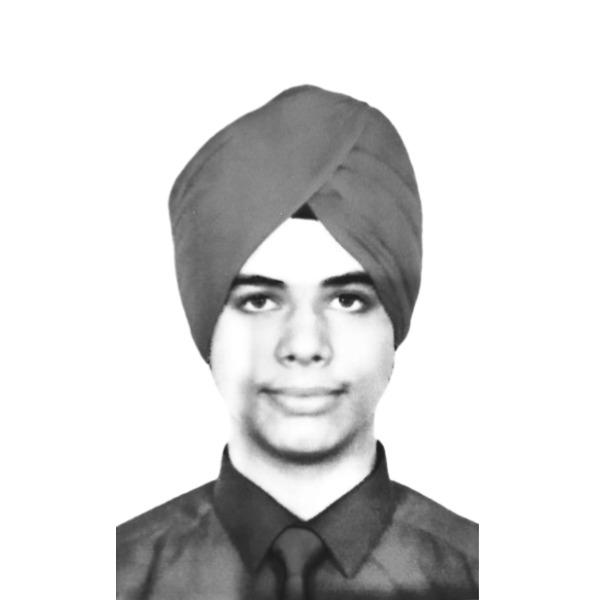

In [ ]:
from IPython.display import display

# Display the decrypted image inline in the notebook
display(decrypted_img)

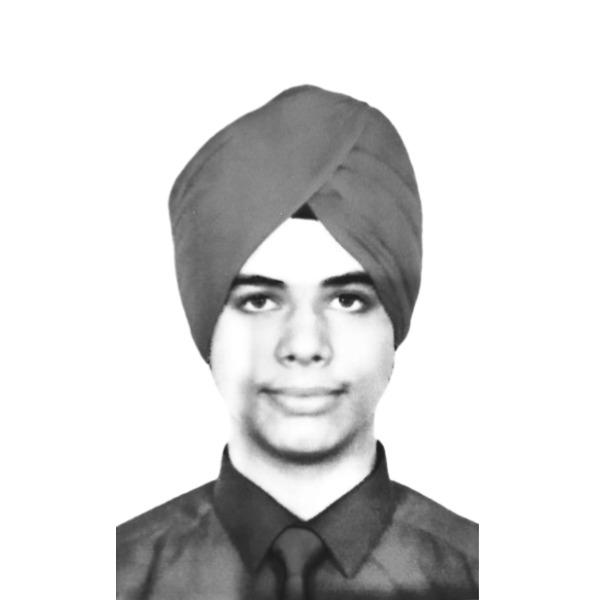

In [ ]:
from Crypto.PublicKey import RSA
from Crypto.Cipher import PKCS1_OAEP
import base64
from PIL import Image
import io
from IPython.display import display

# Function to encrypt data in chunks
def rsa_encrypt_in_chunks(public_key, data, chunk_size=214):
    cipher_rsa = PKCS1_OAEP.new(RSA.import_key(public_key))
    encrypted_data = b""

    # Process the data in chunks
    for i in range(0, len(data), chunk_size):
        chunk = data[i:i + chunk_size]
        encrypted_data += cipher_rsa.encrypt(chunk)

    return encrypted_data

# Function to decrypt the data in chunks
def rsa_decrypt_in_chunks(private_key, encrypted_data, chunk_size=256):
    cipher_rsa = PKCS1_OAEP.new(RSA.import_key(private_key))
    decrypted_data = b""

    # Process the data in chunks
    for i in range(0, len(encrypted_data), chunk_size):
        chunk = encrypted_data[i:i + chunk_size]
        decrypted_data += cipher_rsa.decrypt(chunk)

    return decrypted_data

# Generate RSA keys
private_key, public_key = generate_rsa_keys()

# Convert Image to bytes
image = Image.open("Bhavdeep Singh Nijhawan.jpg")
img_byte_arr = io.BytesIO()
image.save(img_byte_arr, format='JPEG')
img_bytes = img_byte_arr.getvalue()

# Encrypt image bytes in chunks
encrypted_img = rsa_encrypt_in_chunks(public_key, img_bytes)

# Decrypt image bytes
decrypted_img_bytes = rsa_decrypt_in_chunks(private_key, encrypted_img)

# Convert bytes back to image
decrypted_img = Image.open(io.BytesIO(decrypted_img_bytes))

# Display the decrypted image inline in the notebook
display(decrypted_img)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the Generator (Key Generation)
class KeyGenerator(nn.Module):
    def __init__(self):
        super(KeyGenerator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),  # Latent vector input (size 100)
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 256),  # Output a key of size 256 bytes
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)

# Define the Discriminator (Key Validator)
class KeyDiscriminator(nn.Module):
    def __init__(self):
        super(KeyDiscriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Initialize the Generator and Discriminator
generator = KeyGenerator()
discriminator = KeyDiscriminator()

# Set up the loss function and optimizers
criterion = nn.BCELoss()  # Binary Cross Entropy loss
lr = 0.0002
optimizer_g = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_d = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

# Example to test key generation
z = torch.randn(1, 100)  # Latent vector (random noise) for generator input
generated_key = generator(z)  # Generated cryptographic key

print("Generated Key:", generated_key)

Generated Key: tensor([[-6.8881e-02,  7.2613e-02,  3.3107e-02, -1.1498e-02, -1.3210e-01,
          2.0786e-02,  2.8029e-02, -2.2269e-02, -4.5814e-02, -1.5954e-02,
         -4.9222e-02, -4.5696e-03,  3.0171e-02,  1.1435e-02,  4.8934e-02,
          4.1982e-02,  5.6650e-03, -1.4242e-02, -2.8076e-02, -1.0034e-01,
          2.0684e-02,  2.7028e-02, -5.4606e-02,  8.7033e-02,  1.3797e-01,
         -6.4746e-02,  2.3187e-02, -4.8672e-02,  2.1770e-02, -9.1890e-02,
          1.9491e-02, -4.6153e-02, -2.5959e-02, -3.7090e-02,  2.1502e-02,
         -3.6476e-04, -2.3541e-02, -5.2262e-02,  1.0291e-01, -1.0211e-02,
          4.1263e-02, -3.9263e-02,  2.6024e-03,  1.3162e-04, -1.5588e-01,
         -3.5405e-02, -3.0193e-02, -3.6802e-02, -1.3391e-02,  1.9736e-02,
          1.0449e-01, -7.9604e-03, -3.6353e-02,  1.3042e-02,  3.2802e-02,
         -4.5484e-02,  5.6453e-02, -4.5781e-02, -7.5647e-02,  1.6427e-04,
         -2.4918e-02, -8.5992e-02,  8.1655e-03,  2.9840e-02, -2.9516e-02,
         -1.5272e-02, -

In [ ]:
# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Training Discriminator
    real_keys = torch.randn(32, 256)  # Real keys (can be randomly generated or predefined)
    fake_keys = generator(torch.randn(32, 100)).detach()  # Fake keys from generator

    optimizer_d.zero_grad()

    real_labels = torch.ones(32, 1)
    fake_labels = torch.zeros(32, 1)

    real_outputs = discriminator(real_keys)
    fake_outputs = discriminator(fake_keys)

    d_loss_real = criterion(real_outputs, real_labels)
    d_loss_fake = criterion(fake_outputs, fake_labels)
    d_loss = d_loss_real + d_loss_fake

    d_loss.backward()
    optimizer_d.step()

    # Training Generator
    optimizer_g.zero_grad()

    fake_keys = generator(torch.randn(32, 100))  # Generate new fake keys
    fake_outputs = discriminator(fake_keys)

    g_loss = criterion(fake_outputs, real_labels)  # We want the discriminator to think the fake keys are real

    g_loss.backward()
    optimizer_g.step()

    # Print loss
    if epoch % 100 == 0:
        print(f'Epoch [{epoch}/{num_epochs}], D Loss: {d_loss.item()}, G Loss: {g_loss.item()}')

    # Optionally, save the generated keys for analysis

Epoch [0/1000], D Loss: 1.423659086227417, G Loss: 0.7142772674560547
Epoch [100/1000], D Loss: 1.088102102279663, G Loss: 0.941788911819458
Epoch [200/1000], D Loss: 0.8983352184295654, G Loss: 1.2705962657928467
Epoch [300/1000], D Loss: 0.9377832412719727, G Loss: 1.4516515731811523
Epoch [400/1000], D Loss: 0.913277268409729, G Loss: 2.3660874366760254
Epoch [500/1000], D Loss: 0.5581562519073486, G Loss: 3.024909734725952
Epoch [600/1000], D Loss: 0.5856430530548096, G Loss: 4.27862548828125
Epoch [700/1000], D Loss: 0.32984185218811035, G Loss: 4.248719692230225
Epoch [800/1000], D Loss: 0.37063753604888916, G Loss: 5.343463897705078
Epoch [900/1000], D Loss: 0.30999910831451416, G Loss: 4.992666244506836


In [ ]:
# Now use RSA to encrypt the AES key (no decoding needed, keep it as binary)
encrypted_aes_key = rsa_encrypt(public_key, base64.b64encode(aes_key).decode())  # base64 encode the binary AES key
print(f"Encrypted AES Key: {encrypted_aes_key}")

Encrypted AES Key: SA2mPh0p6oVDTEXwWXdou9v8621ZNGAGk4F9yFGAdaBIJt3BAeH8FSC+/IDsmIoE6yApxuquCLG2f0MEp+1NhQzfwT1Hu51eGRYo00r61BfETRpePMhvUwk7MSSXufV4tQWuOeciStggJ+YOqoK1FrG3ha9gHHNuHJHE2ffz99RTz9unKSif/fN9oUiX7AbIs/FNpNPyfc6WG/pZFfZtxgGOPp/Xydcn4yG7FLDFkrZvHxIizYTLv1Uq1fscxKCoK/P7x4/t1T6XSIzcMed56DdA17ZKTASpyiEZkB57yBa4OFgof2/VGUit0VD8CPEG7rcY4V6BWNMtzGZCHI2H1Q==


In [ ]:
from Crypto.PublicKey import RSA

# Generate RSA key pair
key = RSA.generate(2048)

# Export and save the private key
private_key = key.export_key()
with open("private.pem", "wb") as f:
    f.write(private_key)

# Export and save the public key
public_key = key.publickey().export_key()
with open("public.pem", "wb") as f:
    f.write(public_key)

print("RSA key pair generated and saved.")

RSA key pair generated and saved.


In [ ]:
from Crypto.PublicKey import RSA
from Crypto.Cipher import PKCS1_OAEP
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad
import base64
import os

# Function to generate an AES key
def generate_aes_key():
    return os.urandom(32)  # AES-256 key (32 bytes)

# Function to encrypt data using AES
def aes_encrypt(data, aes_key):
    cipher_aes = AES.new(aes_key, AES.MODE_CBC)  # Using CBC mode
    ct_bytes = cipher_aes.encrypt(pad(data.encode(), AES.block_size))
    iv = base64.b64encode(cipher_aes.iv).decode('utf-8')  # IV used in encryption
    ct = base64.b64encode(ct_bytes).decode('utf-8')  # Ciphertext encoded in base64
    return iv, ct

# Function to encrypt the AES key with RSA
def rsa_encrypt(public_key, data):
    cipher_rsa = PKCS1_OAEP.new(public_key)
    encrypted_data = cipher_rsa.encrypt(data)  # No need to encode() for bytes data
    return base64.b64encode(encrypted_data).decode()

# Function to load RSA public key from a file
def load_public_key(key_file):
    with open(key_file, 'r') as f:
        key_data = f.read()
    return RSA.import_key(key_data)

# Example of usage
# Generate AES key
aes_key = generate_aes_key()

# Encrypt some data using AES
data_to_encrypt = "This is some data to encrypt."
iv, encrypted_data = aes_encrypt(data_to_encrypt, aes_key)
print(f"Encrypted Data (AES): {encrypted_data}")

# Load RSA public key (make sure you have an RSA public key in a file called 'public.pem')
public_key = load_public_key('public.pem')

# Encrypt AES key with RSA
encrypted_aes_key = rsa_encrypt(public_key, aes_key)
print(f"Encrypted AES Key: {encrypted_aes_key}")

Encrypted Data (AES): E+J7pyBwJGM9GDM3KDbO9AyHKEETRQl8vsfYGUkzFr0=
Encrypted AES Key: CK8/CVHc8xkgU54I80nNpKBzSsuJ1UyjrLnSaJK/SAwNz9KzQBH/1sR+kLDHJXnuH4eau63iySsx0v0vuMjr7Reb1LW8Xc5qKUoLufT8KERcbU1B1o4ZxIbtonHhYlPuJTxbDRCTyMlgWJHtl7e11kO8O+LSdem+D+VUW1Ofk3JRQ0DsqaWIX2veN3nmk2pB9ozIiV84/PwScRHM/xhaHwHgVlT5DFV0ec2zswWvj2gNCTnPao31jbc90G46ALD8JRl3ZfiG8sYFO7MF28iHyZ8I93AGg0AC6UYxh/AB0KSNVBfVOKFp45zK7TWh0WGd1CRM/Rek1Z19AqOwKmJcNw==


In [ ]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 55.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Define the Generator
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, output_dim),
            nn.Tanh()  # Output in range [-1, 1]
        )

    def forward(self, x):
        return self.model(x)

# Define the Discriminator
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()  # Output probability (real or fake)
        )

    def forward(self, x):
        return self.model(x)

# Hyperparameters
input_dim = 100  # Size of random noise vector
output_dim = 256  # Size of generated seed
batch_size = 64
epochs = 1000
lr = 0.0002

# Initialize models
generator = Generator(input_dim, output_dim)
discriminator = Discriminator(output_dim)

# Optimizers
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)

# Loss function
criterion = nn.BCELoss()

# Training loop
for epoch in range(epochs):
    # Real data (cryptographic random noise)
    real_data = torch.randn(batch_size, output_dim)  # Real random noise
    real_labels = torch.ones(batch_size, 1)  # Label for real data

    # Fake data (generated by GAN)
    noise = torch.randn(batch_size, input_dim)  # Random input noise
    fake_data = generator(noise)
    fake_labels = torch.zeros(batch_size, 1)  # Label for fake data

    # Train Discriminator
    optimizer_D.zero_grad()
    real_loss = criterion(discriminator(real_data), real_labels)
    fake_loss = criterion(discriminator(fake_data.detach()), fake_labels)
    d_loss = real_loss + fake_loss
    d_loss.backward()
    optimizer_D.step()

    # Train Generator
    optimizer_G.zero_grad()
    g_loss = criterion(discriminator(fake_data), real_labels)  # Trick the discriminator
    g_loss.backward()
    optimizer_G.step()

    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch [{epoch}/{epochs}] | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")

# Save the trained generator
torch.save(generator.state_dict(), "generator.pth")

Epoch [0/1000] | D Loss: 1.3661 | G Loss: 0.6904
Epoch [100/1000] | D Loss: 0.9890 | G Loss: 0.6759
Epoch [200/1000] | D Loss: 1.5139 | G Loss: 1.6510
Epoch [300/1000] | D Loss: 0.6415 | G Loss: 2.5917
Epoch [400/1000] | D Loss: 0.7798 | G Loss: 2.8149
Epoch [500/1000] | D Loss: 0.4959 | G Loss: 2.7638
Epoch [600/1000] | D Loss: 0.2418 | G Loss: 2.9374
Epoch [700/1000] | D Loss: 0.7407 | G Loss: 0.8043
Epoch [800/1000] | D Loss: 0.4893 | G Loss: 1.0436
Epoch [900/1000] | D Loss: 0.2591 | G Loss: 1.5871


In [ ]:
# Load the trained generator
generator.load_state_dict(torch.load("generator.pth"))

# Generate a random seed
noise = torch.randn(1, input_dim)  # Random input noise
random_seed = generator(noise).detach().numpy()  # Generated seed
print("Generated Seed:", random_seed)

Generated Seed: [[ 0.0891505  -0.00455829  0.14573017 -0.08537688  0.02432501 -0.04388292
   0.07796122 -0.01836415  0.00914089  0.16011453  0.02274286  0.05488032
  -0.02189741 -0.10490962  0.05630224  0.02022118 -0.02690516  0.10827912
   0.17895746  0.17524233 -0.049426    0.07373596  0.16132548  0.01339921
   0.01574807 -0.05768218  0.00330855 -0.09456591  0.047022   -0.08778407
   0.16108334 -0.10523957  0.02720861 -0.22945434 -0.01980731 -0.18561573
  -0.03712118 -0.09647782 -0.09572729  0.11779168 -0.10838702 -0.11403417
   0.08825336  0.00254173 -0.06524029  0.12364636  0.03894019 -0.14975101
  -0.11156861  0.01760978  0.13776249 -0.01097889 -0.04883937 -0.05460289
  -0.00807548  0.09160344 -0.00823237  0.11068697 -0.03156963  0.02905897
   0.036902   -0.11129912 -0.07585484 -0.1280598   0.10889632 -0.01000878
  -0.00672988  0.00249629 -0.04900591 -0.1277598  -0.03665007 -0.07178722
  -0.07160889 -0.04062977  0.0179277   0.05790678 -0.09028083  0.078973
   0.00586192  0.0028616

<ipython-input-3-caac311ee6f4>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  generator.load_state_dict(torch.load("generator.pth"))


In [ ]:
!pip uninstall oqs -y

In [ ]:
!pip install git+https://github.com/open-quantum-safe/liboqs-python.git

  Cloning https://github.com/open-quantum-safe/liboqs-python.git to /tmp/pip-req-build-rwhkyhor
  Running command git clone --filter=blob:none --quiet https://github.com/open-quantum-safe/liboqs-python.git /tmp/pip-req-build-rwhkyhor
  Resolved https://github.com/open-quantum-safe/liboqs-python.git to commit 1a29e9342182c829f4fc2ff47b5366796c7ffb64
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!apt update
!apt install -y cmake gcc libssl-dev

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,369 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,722 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,774 kB]
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/multiverse amd64 Packages [64.2 kB]
Hit:13 https://ppa.launchpad

In [ ]:
!git clone https://github.com/open-quantum-safe/liboqs.git
!cd liboqs && mkdir build && cd build && cmake .. && make && sudo make install

Cloning into 'liboqs'...
remote: Enumerating objects: 37181, done.
remote: Counting objects: 100% (184/184), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 37181 (delta 124), reused 114 (delta 107), pack-reused 36997 (from 2)
Receiving objects: 100% (37181/37181), 149.45 MiB | 22.21 MiB/s, done.
Resolving deltas: 100% (27215/27215), done.
-- The C compiler identification is GNU 11.4.0
-- The ASM compiler identification is GNU
-- Found assembler: /usr/bin/cc
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Performing Test CC_SUPPORTS_WA_NOEXECSTACK
-- Performing Test CC_SUPPORTS_WA_NOEXECSTACK - Success
-- Performing Test LD_SUPPORTS_WL_Z_NOEXECSTACK
-- Performing Test LD_SUPPORTS_WL_Z_NOEXECSTACK - Success
-- Performing Test CMAKE_HAVE_LIBC_PTHREAD
-- Performing Test CMAKE_HAVE_LIBC_PTHREAD - Success
-- Found Thre

In [ ]:
!pip install git+https://github.com/open-quantum-safe/liboqs-python.git

  Cloning https://github.com/open-quantum-safe/liboqs-python.git to /tmp/pip-req-build-ptofgu4q
  Running command git clone --filter=blob:none --quiet https://github.com/open-quantum-safe/liboqs-python.git /tmp/pip-req-build-ptofgu4q
  Resolved https://github.com/open-quantum-safe/liboqs-python.git to commit 1a29e9342182c829f4fc2ff47b5366796c7ffb64
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for liboqs-python: filename=liboqs_python-0.12.0-py3-none-any.whl size=12437 sha256=2417e7d315c2b05e79d367af0717f97ea0b3aeb82f16df9837a0bb427a6e3092
  Stored in directory: /tmp/pip-ephem-wheel-cache-q5_r9j_7/wheels/61/4b/6f/0829e256d638615c8981286f96b5b2b8549ba1f339a31a7865
Successfully built liboqs-python


In [ ]:
!pip show oqs

In [ ]:
import oqs
print(dir(oqs))

liboqs not found, installing it in /root/_oqs


INFO:oqs.oqs:liboqs not found, installing it in /root/_oqs


Installing in 5 seconds...


INFO:oqs.oqs:Installing in 5 seconds...


Installing in 4 seconds...


INFO:oqs.oqs:Installing in 4 seconds...


Installing in 3 seconds...


INFO:oqs.oqs:Installing in 3 seconds...


Installing in 2 seconds...


INFO:oqs.oqs:Installing in 2 seconds...


Installing in 1 seconds...


INFO:oqs.oqs:Installing in 1 seconds...


Done installing liboqs


INFO:oqs.oqs:Done installing liboqs


['KeyEncapsulation', 'MechanismNotEnabledError', 'MechanismNotSupportedError', 'OQS_SUCCESS', 'OQS_VERSION', 'Signature', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'get_enabled_kem_mechanisms', 'get_enabled_sig_mechanisms', 'get_supported_kem_mechanisms', 'get_supported_sig_mechanisms', 'is_kem_enabled', 'is_sig_enabled', 'native', 'oqs', 'oqs_python_version', 'oqs_version']


In [ ]:
from oqs import KeyEncapsulation

# Initialize Kyber
kem = KeyEncapsulation("Kyber512")

# Generate public and private keys
public_key = kem.generate_keypair()
private_key = kem.export_secret_key()

print("Public Key:", public_key)
print("Private Key:", private_key)

Public Key: b'\xb9\xa9C)\xe5\xaa=\x98rB:\x8d$\x96\x95\x86\xc1\x0c\xdf\xc3N\xe8Y\x80)C5=\x9cw\x94\xfb\x9a\xcf\xf5+\x8akM\xbdd8\xbc\xacpHZ!B\x91F\x17\xda.\xd9\xcb@au\xa2\xca\xcc:\t\xea\x08\xdd<1-\x19C\xbc4\x13\x8b\xd6E\x8f<a34y\x99\xa5Ee\xa8t!\xa6;Z</\xca\x06\x0cq\xa0\x90|\x84\x14_\xbb^\xb5\xb1\xb2\x03\x03\x9d\xb4P;\xfaR\xb6HT:|\xa4OZY$\xdbr\x10\xc81\xc02Z\x17\x1fS\x16\xa55\x1fQ,\x86\xcf\xba"\xfaf\x85D\x90SSU\x99\xfa\xf2\x19\xcfWN\x90\xc2Fi\xfc4}\x93\\W\x10e\xf4yb\x1cKl\x1dJz\x1ahc\xb7aZ\xf9<h\xfbJ<\x18\xf1\xb7\x8d\x9a\x82\x08\xdb\x18?\n63\x04\xba\x0b\xaa]\x8e\xf8\x93n&\x85]b:\xea\xe9\x0f}K\x0f\xeeL\x0e\xf2\xb1\t\x1fw6\xecg\xb8\x10\x9a\x9f\x83\x10\tN\x96\x85.\xc1\xac\xc5\x82B[\xbb\x9c`\xa6<\x12K\x94\xdb\xeb\xcf\xf9\xd1.\xc6\xa7=\x9f\xc7n{\xe592\xec\x0b\xd9s\x9b\xda\xf0r.\xd2.#\t(*\x90*8\xb6k\x18\x81\x04\xbc\xbc\x91\x7f\xf2\x94\xb3\x8bV\x90A\x88[\x14p4l\x91\x17R,x\xb9)s\xecN\xb2\x99\xae\x88\xc2-\x02\x04\x15\xe58\x19\xf2\xa4\x90\xea\t\xbev|\xc1\xa8";\xc2\xb5\x92]yif\xa5Y\xa8\x9b\x8d\x07\x0

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Bhavdeep Singh Nijhawan.jpg to Bhavdeep Singh Nijhawan (1).jpg


In [ ]:
!pip install pycryptodome

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 20.1 MB/s eta 0:00:00


In [ ]:
!pip show pycryptodome

Name: pycryptodome
Version: 3.21.0
Summary: Cryptographic library for Python
Home-page: https://www.pycryptodome.org
Author: Helder Eijs
Author-email: helderijs@gmail.com
License: BSD, Public Domain
Location: /usr/local/lib/python3.11/dist-packages
Requires: 
Required-by: 


In [ ]:
from oqs import KeyEncapsulation
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad
import numpy as np
from PIL import Image
import io

# Initialize Kyber
kem = KeyEncapsulation("Kyber512")

# Generate public and private keys
public_key = kem.generate_keypair()
private_key = kem.export_secret_key()

# Encapsulate a symmetric key (e.g., AES)
ciphertext, shared_secret = kem.encap_secret(public_key)

# Load the image
image_path = "Bhavdeep Singh Nijhawan.jpg"  # Replace with your image path
image = Image.open(image_path)
image_bytes = io.BytesIO()
image.save(image_bytes, format="PNG")
image_data = image_bytes.getvalue()

# Encrypt the image using AES
aes_cipher = AES.new(shared_secret, AES.MODE_CBC)
encrypted_image = aes_cipher.encrypt(pad(image_data, AES.block_size))

# Save the encrypted image
with open("encrypted_image.bin", "wb") as f:
    f.write(encrypted_image)

print("Image encrypted and saved as 'encrypted_image.bin'")

Image encrypted and saved as 'encrypted_image.bin'


In [ ]:
print("Encrypted Data:", encrypted_image)

Encrypted Data: b'|\x88r\xf4\xda<\xdf\x08q\x82\x89\x19\xe5\xd4\xd75\x8b7M\xbe\xf75s\x96\xbd\xf3\xba+\x15o_\x7f\xc8\xcc;\x14!$\xfb?0\xb3\xdd\xc7\x93\x02\x05O\xdc\x068\xc9\xb7\xf36\xfd\x03\xda\x95\tW\x97\xbeP\xd5|^\x87\x96\xb1H-\xdc\xd0\to\x18v(9\xc4\xfa\x07g\xfd5\xfc\xca4\\\x84\x9bY\xe8+\x17\x1a\xbc\x01\x86\xd2\xdd\x14\x1cHmM\xf0c\xb0\x8f\x13\xec\xd4>*\x8d|\xc2\xdf\\v\x8d31>\xd91 h\xa9\xcbN\xa1\x831\xe1\xd0\x8eS\x83\xa42\xb7F\x80\xf7\xdd%\xb3S\xfb:-lN\xbeT\'F\x900\xfaE\x8e++\x9f\x1b\x1e\xb7\x94\xffUY\xb4\xec\xa9.$\x94\xab\xb6V\xf4\x15\xf9\xdd\xa3LW\xa1\x03$C\xa9\xd2\xae6\x9aX\x01FB\xc5\n\xb5.g\x92\xf5\x7f\xdd!\r\x06\\\xb8]\x07\xccs2\xdbWq\x9al\x8f_:\x991~;\xf7\xf0JF\x04\xab\x0b\xae\xa5A\xdc\xd1\xb7\xd8FPBE\x88\xbb=\x8e\x99\xb3;\xd5\x01-8\xe7d\x94\xb2\xf9\x8f\xd6?\x19o6x=\xe7FHb\xb0P\\\x81\x19\xa9XM\x0b\rn\xde<\x81\t\xed\x92HH\xa8<aUoDD\x1c%\xb2m\x88\x9c=\xbc\xd2\xb72O\xd7\xceY\xe5\xa3\x9d\xec4d\x1e\x9bu\x85\xed\x80\xc4\xd4&\xb5\x0e\xfc\xbe\xc6K\x88\xa5\xe2:\x19\x1d\x96i\xfdqh\x82A\x9b\'

In [ ]:
from PIL import Image

# Attempt to open the encrypted file as an image (will fail)
try:
    encrypted_image_view = Image.open("encrypted_image.bin")
    encrypted_image_view.show()
except Exception as e:
    print("Error:", e)

Error: cannot identify image file 'encrypted_image.bin'


In [ ]:
import numpy as np
from PIL import Image

# Convert encrypted data to a numpy array
encrypted_array = np.frombuffer(encrypted_image, dtype=np.uint8)

# Determine the dimensions of the visualization image
# We'll create a square image for simplicity
num_pixels = len(encrypted_array)
side_length = int(np.sqrt(num_pixels))  # Approximate square shape

# Trim the array to fit into a square
encrypted_array = encrypted_array[:side_length * side_length]

# Reshape the array into a 2D image
encrypted_array = encrypted_array.reshape((side_length, side_length))

# Normalize the data to the range [0, 255] (already in uint8, so this step is optional)
encrypted_array = (encrypted_array - encrypted_array.min()) / (encrypted_array.max() - encrypted_array.min()) * 255
encrypted_array = encrypted_array.astype(np.uint8)

# Convert to a PIL image and save/display
encrypted_image_visual = Image.fromarray(encrypted_array, mode="L")  # Grayscale
encrypted_image_visual.save("encrypted_visual.png")
encrypted_image_visual.show()

In [ ]:
print("Encrypted Data:", encrypted_image)

Encrypted Data: b'|\x88r\xf4\xda<\xdf\x08q\x82\x89\x19\xe5\xd4\xd75\x8b7M\xbe\xf75s\x96\xbd\xf3\xba+\x15o_\x7f\xc8\xcc;\x14!$\xfb?0\xb3\xdd\xc7\x93\x02\x05O\xdc\x068\xc9\xb7\xf36\xfd\x03\xda\x95\tW\x97\xbeP\xd5|^\x87\x96\xb1H-\xdc\xd0\to\x18v(9\xc4\xfa\x07g\xfd5\xfc\xca4\\\x84\x9bY\xe8+\x17\x1a\xbc\x01\x86\xd2\xdd\x14\x1cHmM\xf0c\xb0\x8f\x13\xec\xd4>*\x8d|\xc2\xdf\\v\x8d31>\xd91 h\xa9\xcbN\xa1\x831\xe1\xd0\x8eS\x83\xa42\xb7F\x80\xf7\xdd%\xb3S\xfb:-lN\xbeT\'F\x900\xfaE\x8e++\x9f\x1b\x1e\xb7\x94\xffUY\xb4\xec\xa9.$\x94\xab\xb6V\xf4\x15\xf9\xdd\xa3LW\xa1\x03$C\xa9\xd2\xae6\x9aX\x01FB\xc5\n\xb5.g\x92\xf5\x7f\xdd!\r\x06\\\xb8]\x07\xccs2\xdbWq\x9al\x8f_:\x991~;\xf7\xf0JF\x04\xab\x0b\xae\xa5A\xdc\xd1\xb7\xd8FPBE\x88\xbb=\x8e\x99\xb3;\xd5\x01-8\xe7d\x94\xb2\xf9\x8f\xd6?\x19o6x=\xe7FHb\xb0P\\\x81\x19\xa9XM\x0b\rn\xde<\x81\t\xed\x92HH\xa8<aUoDD\x1c%\xb2m\x88\x9c=\xbc\xd2\xb72O\xd7\xceY\xe5\xa3\x9d\xec4d\x1e\x9bu\x85\xed\x80\xc4\xd4&\xb5\x0e\xfc\xbe\xc6K\x88\xa5\xe2:\x19\x1d\x96i\xfdqh\x82A\x9b\'

In [ ]:
print("Array Shape:", encrypted_array.shape)

Array Shape: (316, 316)


In [ ]:
from oqs import KeyEncapsulation
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad
from PIL import Image
import io

# Initialize Kyber
kem = KeyEncapsulation("Kyber512")

# Generate public and private keys
public_key = kem.generate_keypair()
private_key = kem.export_secret_key()

# Encapsulate a symmetric key (e.g., AES)
ciphertext, shared_secret = kem.encap_secret(public_key)

# Load the image
image_path = "Bhavdeep Singh Nijhawan.jpg"  # Replace with your image path
image = Image.open(image_path)
image_bytes = io.BytesIO()
image.save(image_bytes, format="PNG")
image_data = image_bytes.getvalue()

# Encrypt the image using AES
aes_cipher = AES.new(shared_secret, AES.MODE_CBC)
encrypted_image = aes_cipher.encrypt(pad(image_data, AES.block_size))

# Save the encrypted image
with open("encrypted_image.bin", "wb") as f:
    f.write(encrypted_image)

print("Image encrypted and saved as 'encrypted_image.bin'")

Image encrypted and saved as 'encrypted_image.bin'


In [ ]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import unpad
from PIL import Image
import io

# Decapsulate the shared secret using the private key
shared_secret = kem.decap_secret(ciphertext)

# Decrypt the image using AES
aes_cipher = AES.new(shared_secret, AES.MODE_CBC)
decrypted_image_data = aes_cipher.decrypt(encrypted_image)
decrypted_image_data = unpad(decrypted_image_data, AES.block_size)

# Save the decrypted image
try:
    decrypted_image = Image.open(io.BytesIO(decrypted_image_data))
    decrypted_image.save("decrypted_image.png")
    print("Image decrypted and saved as 'decrypted_image.png'")
except Exception as e:
    print("Decryption failed:", e)

Decryption failed: cannot identify image file <_io.BytesIO object at 0x7e84835eb3d0>


In [ ]:
print("Shared Secret (Encryption):", shared_secret)
print("Shared Secret (Decryption):", kem.decap_secret(ciphertext))

Shared Secret (Encryption): b'\x8dy\x80\x13b7p\xf2\xfec,\x1f\xe8\x0ba\xbbf"Z,x\xba\xb36\xfb\x85\x89G\xfc\xf0\x8d\xb7'
Shared Secret (Decryption): b'\x8dy\x80\x13b7p\xf2\xfec,\x1f\xe8\x0ba\xbbf"Z,x\xba\xb36\xfb\x85\x89G\xfc\xf0\x8d\xb7'


In [ ]:
print("Encrypted Data Length:", len(encrypted_image))

Encrypted Data Length: 99936


In [ ]:
print("Decrypted Data (First 100 bytes):", decrypted_image_data[:100])

Decrypted Data (First 100 bytes): b'Y\xf2\xa3S\xf4Y\x02\xec\x85\xc7:\xe0\x0fkj\x99\x00\x00\x02X\x00\x00\x02X\x08\x02\x00\x00\x001\x04\x0f\x8b\x00\x00\x01\x04iCCPICC Profile\x00\x00x\x9cc``<\xc1\x00\x04,\x06\x0c\x0c\xb9y%EA\xeeN\n\x11\x91Q\n\x0cH 1\xb9\xb8\x80\x017`d`\xf8v\rD20\\\xd6\xc5'


In [ ]:
from oqs import KeyEncapsulation
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad
from PIL import Image
import io

# Initialize Kyber
kem = KeyEncapsulation("Kyber512")

# Generate public and private keys
public_key = kem.generate_keypair()
private_key = kem.export_secret_key()

# Encapsulate a symmetric key (e.g., AES)
ciphertext, shared_secret = kem.encap_secret(public_key)

# Load the image
image_path = "Bhavdeep Singh Nijhawan.jpg"  # Replace with your image path
image = Image.open(image_path)
image_bytes = io.BytesIO()
image.save(image_bytes, format="PNG")
image_data = image_bytes.getvalue()

# Encrypt the image using AES
aes_cipher = AES.new(shared_secret, AES.MODE_CBC)
encrypted_image = aes_cipher.encrypt(pad(image_data, AES.block_size))

# Save the encrypted image
with open("encrypted_image.bin", "wb") as f:
    f.write(encrypted_image)

print("Image encrypted and saved as 'encrypted_image.bin'")

Image encrypted and saved as 'encrypted_image.bin'


In [ ]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import unpad
from PIL import Image
import io

# Decapsulate the shared secret using the private key
shared_secret = kem.decap_secret(ciphertext)

# Decrypt the image using AES
aes_cipher = AES.new(shared_secret, AES.MODE_CBC)
decrypted_image_data = aes_cipher.decrypt(encrypted_image)
decrypted_image_data = unpad(decrypted_image_data, AES.block_size)

# Save the decrypted image
try:
    decrypted_image = Image.open(io.BytesIO(decrypted_image_data))
    decrypted_image.save("decrypted_image.png")
    print("Image decrypted and saved as 'decrypted_image.png'")
except Exception as e:
    print("Decryption failed:", e)

Decryption failed: cannot identify image file <_io.BytesIO object at 0x7e8462d279c0>


In [ ]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad
import os

# Generate a random IV
iv = os.urandom(16)

# Encrypt the image using AES
aes_cipher = AES.new(shared_secret, AES.MODE_CBC, iv)
encrypted_image = aes_cipher.encrypt(pad(image_data, AES.block_size))

# Save the IV and encrypted data
with open("encrypted_image.bin", "wb") as f:
    f.write(iv + encrypted_image)

print("Image encrypted and saved as 'encrypted_image.bin'")

Image encrypted and saved as 'encrypted_image.bin'


In [ ]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import unpad

# Load the encrypted data
with open("encrypted_image.bin", "rb") as f:
    encrypted_data = f.read()
    iv = encrypted_data[:16]  # Extract the IV
    encrypted_image = encrypted_data[16:]  # Extract the encrypted image

# Decrypt the image using AES
aes_cipher = AES.new(shared_secret, AES.MODE_CBC, iv)
decrypted_image_data = aes_cipher.decrypt(encrypted_image)
decrypted_image_data = unpad(decrypted_image_data, AES.block_size)

# Save the decrypted image
try:
    decrypted_image = Image.open(io.BytesIO(decrypted_image_data))
    decrypted_image.save("decrypted_image.png")
    print("Image decrypted and saved as 'decrypted_image.png'")
except Exception as e:
    print("Decryption failed:", e)

Image decrypted and saved as 'decrypted_image.png'


In [ ]:
print("Decrypted Data (First 100 bytes):", decrypted_image_data[:100])

Decrypted Data (First 100 bytes): b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02X\x00\x00\x02X\x08\x02\x00\x00\x001\x04\x0f\x8b\x00\x00\x01\x04iCCPICC Profile\x00\x00x\x9cc``<\xc1\x00\x04,\x06\x0c\x0c\xb9y%EA\xeeN\n\x11\x91Q\n\x0cH 1\xb9\xb8\x80\x017`d`\xf8v\rD20\\\xd6\xc5'


In [ ]:
image.save(image_bytes, format="PNG")

In [ ]:
print("IV:", iv)

IV: b's\xf8C\xd89\xd0e\x97\xed0\xd5\x9bM-\xd9\xe9'


In [ ]:
from oqs import KeyEncapsulation
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad
from PIL import Image
import io
import hashlib
import os

# Initialize Kyber
kem = KeyEncapsulation("Kyber512")

# Generate public and private keys
public_key = kem.generate_keypair()
private_key = kem.export_secret_key()

# Encapsulate a symmetric key (e.g., AES)
ciphertext, shared_secret = kem.encap_secret(public_key)

# Load the image
image_path = "Bhavdeep Singh Nijhawan.jpg"  # Replace with your image path
image = Image.open(image_path)
image_bytes = io.BytesIO()
image.save(image_bytes, format="PNG")
image_data = image_bytes.getvalue()

# Compute the checksum of the original image
original_checksum = hashlib.sha256(image_data).hexdigest()

# Generate a random IV
iv = os.urandom(16)

# Encrypt the image using AES
aes_cipher = AES.new(shared_secret, AES.MODE_CBC, iv)
encrypted_image = aes_cipher.encrypt(pad(image_data, AES.block_size))

# Save the IV, checksum, and encrypted data
with open("encrypted_image.bin", "wb") as f:
    f.write(iv + original_checksum.encode() + encrypted_image)

print("Image encrypted and saved as 'encrypted_image.bin'")

Image encrypted and saved as 'encrypted_image.bin'


In [ ]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import unpad
from PIL import Image
import io
import hashlib

# Load the encrypted data
with open("encrypted_image.bin", "rb") as f:
    encrypted_data = f.read()
    iv = encrypted_data[:16]  # Extract the IV
    embedded_checksum = encrypted_data[16:48].decode()  # Extract the checksum (32 bytes)
    encrypted_image = encrypted_data[48:]  # Extract the encrypted image

# Decrypt the image using AES
aes_cipher = AES.new(shared_secret, AES.MODE_CBC, iv)
decrypted_image_data = aes_cipher.decrypt(encrypted_image)
decrypted_image_data = unpad(decrypted_image_data, AES.block_size)

# Recompute the checksum of the decrypted image
decrypted_checksum = hashlib.sha256(decrypted_image_data).hexdigest()

# Compare the checksums
if embedded_checksum == decrypted_checksum:
    print("No tampering detected.")
else:
    print("Tampering detected!")

# Save the decrypted image
try:
    decrypted_image = Image.open(io.BytesIO(decrypted_image_data))
    decrypted_image.save("decrypted_image.png")
    print("Image decrypted and saved as 'decrypted_image.png'")
except Exception as e:
    print("Decryption failed:", e)

Tampering detected!
Decryption failed: cannot identify image file <_io.BytesIO object at 0x7e8462d27920>


In [ ]:
print("Embedded Checksum:", embedded_checksum)
print("Decrypted Checksum:", decrypted_checksum)

Embedded Checksum: 3758bb0f709953d4779efd8f20220d9e
Decrypted Checksum: aa5a3b4db0d8d9eb48d5bfdd582731627bf1fdf19bdd7af1ad758d63825753c0


In [ ]:
print("IV (Encryption):", iv)
print("IV (Decryption):", iv)  # This should be the same as during encryption

IV (Encryption): b'\xa3=J\xd8?Np\xaf\xa3|\x179\x0b\x8d\x02\x87'
IV (Decryption): b'\xa3=J\xd8?Np\xaf\xa3|\x179\x0b\x8d\x02\x87'


In [ ]:
print("Shared Secret (Encryption):", shared_secret)
print("Shared Secret (Decryption):", shared_secret)  # This should be the same

Shared Secret (Encryption): b'pN\xbe</\xd1\xb3\xa9F\xd2]\xb0\xacew\xe4\xb4jX\xeb\x8e=\xcf|\xcd\x87\x13\xbd\x8d\x14w\xf5'
Shared Secret (Decryption): b'pN\xbe</\xd1\xb3\xa9F\xd2]\xb0\xacew\xe4\xb4jX\xeb\x8e=\xcf|\xcd\x87\x13\xbd\x8d\x14w\xf5'


In [ ]:
print("Decrypted Data Length:", len(decrypted_image_data))

Decrypted Data Length: 99967


In [ ]:
print("Encrypted Data Length:", len(encrypted_image))

Encrypted Data Length: 99968


In [ ]:
print("Decrypted Data (First 100 bytes):", decrypted_image_data[:100])

Decrypted Data (First 100 bytes): b'`\x80\x1e\x17L\xd1H\xa3<\xac\x83\x19j\xf7m\xee\\`\xf1n\xf1\x8b\xb9\xee1\xb4F\xd7\x1e\xa9\xa0?L^f\xf9\x06r^\xc7\xc6H%\x06q\xf3w\xed\x00\x00\x02X\x00\x00\x02X\x08\x02\x00\x00\x001\x04\x0f\x8b\x00\x00\x01\x04iCCPICC Profile\x00\x00x\x9cc``<\xc1\x00\x04,\x06\x0c\x0c\xb9'


In [ ]:
from oqs import KeyEncapsulation
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad
from PIL import Image
import io
import hashlib
import os

# Initialize Kyber
kem = KeyEncapsulation("Kyber512")

# Generate public and private keys
public_key = kem.generate_keypair()
private_key = kem.export_secret_key()

# Encapsulate a symmetric key (e.g., AES)
ciphertext, shared_secret = kem.encap_secret(public_key)

# Load the image
image_path = "Bhavdeep Singh Nijhawan.jpg"  # Replace with your image path
image = Image.open(image_path)
image_bytes = io.BytesIO()
image.save(image_bytes, format="PNG")
image_data = image_bytes.getvalue()

# Compute the checksum of the original image
original_checksum = hashlib.sha256(image_data).hexdigest()

# Generate a random IV
iv = os.urandom(16)

# Encrypt the image using AES
aes_cipher = AES.new(shared_secret, AES.MODE_CBC, iv)
encrypted_image = aes_cipher.encrypt(pad(image_data, AES.block_size))

# Save the IV, checksum, and encrypted data
with open("encrypted_image.bin", "wb") as f:
    f.write(iv + original_checksum.encode() + encrypted_image)

print("Image encrypted and saved as 'encrypted_image.bin'")

Image encrypted and saved as 'encrypted_image.bin'


In [ ]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import unpad
from PIL import Image
import io
import hashlib

# Load the encrypted data
with open("encrypted_image.bin", "rb") as f:
    encrypted_data = f.read()
    iv = encrypted_data[:16]  # Extract the IV
    embedded_checksum = encrypted_data[16:48].decode()  # Extract the checksum (32 bytes)
    encrypted_image = encrypted_data[48:]  # Extract the encrypted image

# Decrypt the image using AES
aes_cipher = AES.new(shared_secret, AES.MODE_CBC, iv)
decrypted_image_data = aes_cipher.decrypt(encrypted_image)
decrypted_image_data = unpad(decrypted_image_data, AES.block_size)

# Recompute the checksum of the decrypted image
decrypted_checksum = hashlib.sha256(decrypted_image_data).hexdigest()

# Compare the checksums
if embedded_checksum == decrypted_checksum:
    print("No tampering detected.")
    # Save the decrypted image
    try:
        decrypted_image = Image.open(io.BytesIO(decrypted_image_data))
        decrypted_image.save("decrypted_image.png")
        print("Image decrypted and saved as 'decrypted_image.png'")
    except Exception as e:
        print("Decryption failed:", e)
else:
    print("Tampering detected!")

Tampering detected!


In [ ]:
from oqs import KeyEncapsulation
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad
from PIL import Image
import io
import hashlib
import os

# Initialize Kyber
kem = KeyEncapsulation("Kyber512")

# Generate public and private keys
public_key = kem.generate_keypair()
private_key = kem.export_secret_key()

# Encapsulate a symmetric key (e.g., AES)
ciphertext, shared_secret = kem.encap_secret(public_key)

# Load the image
image_path = "Bhavdeep Singh Nijhawan.jpg"  # Replace with your image path
image = Image.open(image_path)
image_bytes = io.BytesIO()
image.save(image_bytes, format="PNG")
image_data = image_bytes.getvalue()

# Compute the checksum of the original image
original_checksum = hashlib.sha256(image_data).hexdigest()

# Generate a random IV
iv = os.urandom(16)

# Encrypt the image using AES
aes_cipher = AES.new(shared_secret, AES.MODE_CBC, iv)
encrypted_image = aes_cipher.encrypt(pad(image_data, AES.block_size))

# Save the IV, checksum, and encrypted data
with open("encrypted_image.bin", "wb") as f:
    f.write(iv + original_checksum.encode() + encrypted_image)

print("Image encrypted and saved as 'encrypted_image.bin'")

Image encrypted and saved as 'encrypted_image.bin'


In [ ]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import unpad
from PIL import Image
import io
import hashlib

# Load the encrypted data
with open("encrypted_image.bin", "rb") as f:
    encrypted_data = f.read()
    iv = encrypted_data[:16]  # Extract the IV
    embedded_checksum = encrypted_data[16:48].decode()  # Extract the checksum (32 bytes)
    encrypted_image = encrypted_data[48:]  # Extract the encrypted image

# Decrypt the image using AES
aes_cipher = AES.new(shared_secret, AES.MODE_CBC, iv)
decrypted_image_data = aes_cipher.decrypt(encrypted_image)

# Remove padding
try:
    decrypted_image_data = unpad(decrypted_image_data, AES.block_size)
except ValueError as e:
    print("Padding error:", e)
    decrypted_image_data = b""  # Handle the error gracefully

# Recompute the checksum of the decrypted image
decrypted_checksum = hashlib.sha256(decrypted_image_data).hexdigest()

# Compare the checksums
if embedded_checksum == decrypted_checksum:
    print("No tampering detected.")
    # Save the decrypted image
    try:
        decrypted_image = Image.open(io.BytesIO(decrypted_image_data))
        decrypted_image.save("decrypted_image.png")
        print("Image decrypted and saved as 'decrypted_image.png'")
    except Exception as e:
        print("Decryption failed:", e)
else:
    print("Tampering detected!")

Tampering detected!


In [ ]:
print("Decrypted Data Length (Before Unpad):", len(decrypted_image_data))
print("Decrypted Data Length (After Unpad):", len(decrypted_image_data))

Decrypted Data Length (Before Unpad): 99967
Decrypted Data Length (After Unpad): 99967


In [ ]:
print("Decrypted Data (First 100 bytes):", decrypted_image_data[:100])

Decrypted Data (First 100 bytes): b"\xc4\x7f\xf5\xa6\x85\xaf!\xe1y3\x91\xe6\xd2o8\x03\x8d\xd5\x06}\xaddw\x9c\xdc\x047F%\x90\xe5\x1f\xdc\xae/\xe2o\x0c\xf7'\xb5\xe5\x83\xbd\xe5YBk\x00\x00\x02X\x00\x00\x02X\x08\x02\x00\x00\x001\x04\x0f\x8b\x00\x00\x01\x04iCCPICC Profile\x00\x00x\x9cc``<\xc1\x00\x04,\x06\x0c\x0c\xb9"


In [ ]:
from oqs import KeyEncapsulation
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad
from PIL import Image
import io
import hashlib
import os

# Initialize Kyber
kem = KeyEncapsulation("Kyber512")

# Generate public and private keys
public_key = kem.generate_keypair()
private_key = kem.export_secret_key()

# Encapsulate a symmetric key (e.g., AES)
ciphertext, shared_secret = kem.encap_secret(public_key)

# Load the image
image_path = "Bhavdeep Singh Nijhawan.jpg"  # Replace with your image path
image = Image.open(image_path)
image_bytes = io.BytesIO()
image.save(image_bytes, format="PNG")
image_data = image_bytes.getvalue()

# Compute the checksum of the original image
original_checksum = hashlib.sha256(image_data).hexdigest()

# Generate a random IV
iv = os.urandom(16)

# Encrypt the image using AES
aes_cipher = AES.new(shared_secret, AES.MODE_CBC, iv)
encrypted_image = aes_cipher.encrypt(pad(image_data, AES.block_size))

# Save the IV, checksum, and encrypted data
with open("encrypted_image.bin", "wb") as f:
    f.write(iv + original_checksum.encode() + encrypted_image)

print("Image encrypted and saved as 'encrypted_image.bin'")

Image encrypted and saved as 'encrypted_image.bin'


In [ ]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import unpad
from PIL import Image
import io
import hashlib

# Load the encrypted data
with open("encrypted_image.bin", "rb") as f:
    encrypted_data = f.read()
    iv = encrypted_data[:16]  # Extract the IV
    embedded_checksum = encrypted_data[16:48].decode()  # Extract the checksum (32 bytes)
    encrypted_image = encrypted_data[48:]  # Extract the encrypted image

# Decrypt the image using AES
aes_cipher = AES.new(shared_secret, AES.MODE_CBC, iv)
decrypted_image_data = aes_cipher.decrypt(encrypted_image)

# Remove padding
try:
    decrypted_image_data = unpad(decrypted_image_data, AES.block_size)
except ValueError as e:
    print("Padding error:", e)
    decrypted_image_data = b""  # Handle the error gracefully

# Recompute the checksum of the decrypted image
decrypted_checksum = hashlib.sha256(decrypted_image_data).hexdigest()

# Compare the checksums
if embedded_checksum == decrypted_checksum:
    print("No tampering detected.")
    # Save the decrypted image
    try:
        decrypted_image = Image.open(io.BytesIO(decrypted_image_data))
        decrypted_image.save("decrypted_image.png")
        print("Image decrypted and saved as 'decrypted_image.png'")
    except Exception as e:
        print("Decryption failed:", e)
else:
    print("Tampering detected!")

Tampering detected!


In [ ]:
from google.colab import files
from PIL import Image
import io

# Upload the image
uploaded = files.upload()

# Get the filename of the uploaded image
image_filename = list(uploaded.keys())[0]

# Open the image
image = Image.open(io.BytesIO(uploaded[image_filename]))

# Display the image
image.show()

# Print image details
print("Image uploaded successfully!")
print("Image format:", image.format)
print("Image size:", image.size)

Saving Bhavdeep Singh Nijhawan.jpg to Bhavdeep Singh Nijhawan (1).jpg
Image uploaded successfully!
Image format: JPEG
Image size: (600, 600)


In [ ]:
!pip install git+https://github.com/open-quantum-safe/liboqs-python.git

  Cloning https://github.com/open-quantum-safe/liboqs-python.git to /tmp/pip-req-build-ugp6gyf1
  Running command git clone --filter=blob:none --quiet https://github.com/open-quantum-safe/liboqs-python.git /tmp/pip-req-build-ugp6gyf1
  Resolved https://github.com/open-quantum-safe/liboqs-python.git to commit 1a29e9342182c829f4fc2ff47b5366796c7ffb64
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for liboqs-python: filename=liboqs_python-0.12.0-py3-none-any.whl size=12437 sha256=2417e7d315c2b05e79d367af0717f97ea0b3aeb82f16df9837a0bb427a6e3092
  Stored in directory: /tmp/pip-ephem-wheel-cache-5sp1eqhp/wheels/61/4b/6f/0829e256d638615c8981286f96b5b2b8549ba1f339a31a7865
Successfully built liboqs-python


In [ ]:
!pip install pycryptodome pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 45.4 MB/s eta 0:00:00


In [ ]:
import oqs
print(dir(oqs))

['KeyEncapsulation', 'MechanismNotEnabledError', 'MechanismNotSupportedError', 'OQS_SUCCESS', 'OQS_VERSION', 'Signature', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'get_enabled_kem_mechanisms', 'get_enabled_sig_mechanisms', 'get_supported_kem_mechanisms', 'get_supported_sig_mechanisms', 'is_kem_enabled', 'is_sig_enabled', 'native', 'oqs', 'oqs_python_version', 'oqs_version']


In [ ]:
!pip show oqs pycryptodome pillow

Name: pycryptodome
Version: 3.21.0
Summary: Cryptographic library for Python
Home-page: https://www.pycryptodome.org
Author: Helder Eijs
Author-email: helderijs@gmail.com
License: BSD, Public Domain
Location: /usr/local/lib/python3.11/dist-packages
Requires: 
Required-by: 
---
Name: pillow
Version: 11.1.0
Summary: Python Imaging Library (Fork)
Home-page: https://python-pillow.github.io
Author: 
Author-email: "Jeffrey A. Clark" <aclark@aclark.net>
License: MIT-CMU
Location: /usr/local/lib/python3.11/dist-packages
Requires: 
Required-by: bokeh, diffusers, dopamine_rl, fastai, imageio, imgaug, matplotlib, scikit-image, sentence-transformers, torchvision, wordcloud


In [ ]:
from oqs import KeyEncapsulation
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad
from PIL import Image
import io
import hashlib
import os

# Initialize Kyber
kem = KeyEncapsulation("Kyber512")

# Generate public and private keys
public_key = kem.generate_keypair()
private_key = kem.export_secret_key()

# Encapsulate a symmetric key (e.g., AES)
ciphertext, shared_secret = kem.encap_secret(public_key)

# Load the uploaded image
image = Image.open("Bhavdeep Singh Nijhawan.jpg")
image_bytes = io.BytesIO()
image.save(image_bytes, format="JPEG")  # Save as JPEG (same as original format)
image_data = image_bytes.getvalue()

# Compute the checksum of the original image
original_checksum = hashlib.sha256(image_data).hexdigest()

# Generate a random IV (Initialization Vector)
iv = os.urandom(16)

# Encrypt the image using AES
aes_cipher = AES.new(shared_secret, AES.MODE_CBC, iv)
padded_data = pad(image_data, AES.block_size)  # Add padding
encrypted_image = aes_cipher.encrypt(padded_data)

# Save the IV, checksum, and encrypted data
with open("encrypted_image.bin", "wb") as f:
    f.write(iv + original_checksum.encode() + encrypted_image)

print("Image encrypted and saved as 'encrypted_image.bin'")

Image encrypted and saved as 'encrypted_image.bin'


In [ ]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import unpad
from PIL import Image
import io
import hashlib

# Load the encrypted data
with open("encrypted_image.bin", "rb") as f:
    encrypted_data = f.read()
    iv = encrypted_data[:16]  # Extract the IV
    embedded_checksum = encrypted_data[16:48].decode()  # Extract the checksum (32 bytes)
    encrypted_image = encrypted_data[48:]  # Extract the encrypted image

# Decrypt the image using AES
aes_cipher = AES.new(shared_secret, AES.MODE_CBC, iv)
decrypted_image_data = aes_cipher.decrypt(encrypted_image)

# Remove padding
try:
    decrypted_image_data = unpad(decrypted_image_data, AES.block_size)
except ValueError as e:
    print("Padding error:", e)
    decrypted_image_data = b""  # Handle the error gracefully

# Recompute the checksum of the decrypted image
decrypted_checksum = hashlib.sha256(decrypted_image_data).hexdigest()

# Compare the checksums
if embedded_checksum == decrypted_checksum:
    print("No tampering detected.")
    # Save the decrypted image
    try:
        decrypted_image = Image.open(io.BytesIO(decrypted_image_data))
        decrypted_image.save("decrypted_image.jpg")
        print("Image decrypted and saved as 'decrypted_image.jpg'")
    except Exception as e:
        print("Decryption failed:", e)
else:
    print("Tampering detected!")

Tampering detected!


In [ ]:
print("Embedded Checksum:", embedded_checksum)
print("Decrypted Checksum:", decrypted_checksum)

Embedded Checksum: e25292a99f459efb75bb1ab4fcbc2421
Decrypted Checksum: 80cb98c068521a4602e5c8ee2d7b62f37e41f50a80809c4e2b1c4455979174c0


In [ ]:
print("Decrypted Data (First 100 bytes):", decrypted_image_data[:100])

Decrypted Data (First 100 bytes): b'\xd9\x83\xb3\xd2\xd0\xe7\x01\x0b\x19K\x1d\xf3\xa8\xd0z\xf4\x80\xa2b8&\x1dF\xdd\xef\xd3?&I\x95W\xe4&\x18\x10/\xe2"F\xb3\x120\x9e\xae\x82\xc2s.\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c'


In [ ]:
from oqs import KeyEncapsulation
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad
from PIL import Image
import io
import hashlib
import os

# Initialize Kyber
kem = KeyEncapsulation("Kyber512")

# Generate public and private keys
public_key = kem.generate_keypair()
private_key = kem.export_secret_key()

# Encapsulate a symmetric key (e.g., AES)
ciphertext, shared_secret = kem.encap_secret(public_key)

# Load the uploaded image
image = Image.open("Bhavdeep Singh Nijhawan.jpg")
image_bytes = io.BytesIO()
image.save(image_bytes, format="JPEG")  # Save as JPEG (same as original format)
image_data = image_bytes.getvalue()

# Compute the checksum of the original image
original_checksum = hashlib.sha256(image_data).hexdigest()

# Generate a random IV (Initialization Vector)
iv = os.urandom(16)

# Encrypt the image using AES
aes_cipher = AES.new(shared_secret, AES.MODE_CBC, iv)
padded_data = pad(image_data, AES.block_size)  # Add padding
encrypted_image = aes_cipher.encrypt(padded_data)

# Save the IV, checksum, and encrypted data
with open("encrypted_image.bin", "wb") as f:
    f.write(iv + original_checksum.encode() + encrypted_image)

print("Image encrypted and saved as 'encrypted_image.bin'")

Image encrypted and saved as 'encrypted_image.bin'


In [ ]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import unpad
from PIL import Image
import io
import hashlib

# Load the encrypted data
with open("encrypted_image.bin", "rb") as f:
    encrypted_data = f.read()
    iv = encrypted_data[:16]  # Extract the IV
    embedded_checksum = encrypted_data[16:48].decode()  # Extract the checksum (32 bytes)
    encrypted_image = encrypted_data[48:]  # Extract the encrypted image

# Decrypt the image using AES
aes_cipher = AES.new(shared_secret, AES.MODE_CBC, iv)
decrypted_image_data = aes_cipher.decrypt(encrypted_image)

# Remove padding
try:
    decrypted_image_data = unpad(decrypted_image_data, AES.block_size)
except ValueError as e:
    print("Padding error:", e)
    decrypted_image_data = b""  # Handle the error gracefully

# Recompute the checksum of the decrypted image
decrypted_checksum = hashlib.sha256(decrypted_image_data).hexdigest()

# Compare the checksums
if embedded_checksum == decrypted_checksum:
    print("No tampering detected.")
    # Save the decrypted image
    try:
        decrypted_image = Image.open(io.BytesIO(decrypted_image_data))
        decrypted_image.save("decrypted_image.jpg")
        print("Image decrypted and saved as 'decrypted_image.jpg'")
    except Exception as e:
        print("Decryption failed:", e)
else:
    print("Tampering detected!")

Tampering detected!


In [ ]:
print("Decrypted Data Length (Before Unpad):", len(decrypted_image_data))
print("Decrypted Data Length (After Unpad):", len(decrypted_image_data))

Decrypted Data Length (Before Unpad): 18155
Decrypted Data Length (After Unpad): 18155


In [ ]:
print("Shared Secret (Encryption):", shared_secret)

Shared Secret (Encryption): b'\x0e\xcd\xfe\x9b\xbd$\x1f\x88q_\xe8*q\xc2\xba8\xb5y\x98l\x8d9\x8f\xbba\xdf\xca\xe8\xd7\xdcK\xf3'


In [ ]:
print("Shared Secret (Decryption):", shared_secret)

Shared Secret (Decryption): b'\x0e\xcd\xfe\x9b\xbd$\x1f\x88q_\xe8*q\xc2\xba8\xb5y\x98l\x8d9\x8f\xbba\xdf\xca\xe8\xd7\xdcK\xf3'


In [ ]:
print("Original Data Length:", len(image_data))
print("Padded Data Length:", len(padded_data))

Original Data Length: 18123
Padded Data Length: 18128


In [ ]:
print("Decrypted Data Length (Before Unpad):", len(decrypted_image_data))
print("Decrypted Data Length (After Unpad):", len(decrypted_image_data))

Decrypted Data Length (Before Unpad): 18155
Decrypted Data Length (After Unpad): 18155


In [ ]:
from Crypto.Util.Padding import pad

# Add padding to the original data
padded_data = pad(image_data, AES.block_size)
print("Padded Data Length:", len(padded_data))
print("Padded Data (Last 16 bytes):", padded_data[-16:])

Padded Data Length: 18128
Padded Data (Last 16 bytes): b'\x00QE\x14\x00QE\x14\x01\xff\xd9\x05\x05\x05\x05\x05'


In [ ]:
from Crypto.Util.Padding import unpad

# Remove padding from the decrypted data
try:
    decrypted_image_data = unpad(decrypted_image_data, AES.block_size)
    print("Unpadded Data Length:", len(decrypted_image_data))
except ValueError as e:
    print("Padding error:", e)

Padding error: Input data is not padded


In [30]:
from Crypto.Util.Padding import pad

# Add padding to the original data
padded_data = pad(image_data, AES.block_size)
print("Padded Data Length:", len(padded_data))
print("Padded Data (Last 16 bytes):", padded_data[-16:])

Padded Data Length: 18128
Padded Data (Last 16 bytes): b'\x00QE\x14\x00QE\x14\x01\xff\xd9\x05\x05\x05\x05\x05'


In [31]:
from Crypto.Util.Padding import unpad

# Remove padding from the decrypted data
try:
    decrypted_image_data = unpad(decrypted_image_data, AES.block_size)
    print("Unpadded Data Length:", len(decrypted_image_data))
except ValueError as e:
    print("Padding error:", e)

Padding error: Input data is not padded


In [2]:
!pip install git+https://github.com/open-quantum-safe/liboqs-python.git

  Cloning https://github.com/open-quantum-safe/liboqs-python.git to /tmp/pip-req-build-ykhnbb37
  Running command git clone --filter=blob:none --quiet https://github.com/open-quantum-safe/liboqs-python.git /tmp/pip-req-build-ykhnbb37
  Resolved https://github.com/open-quantum-safe/liboqs-python.git to commit 1a29e9342182c829f4fc2ff47b5366796c7ffb64
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for liboqs-python: filename=liboqs_python-0.12.0-py3-none-any.whl size=12437 sha256=2417e7d315c2b05e79d367af0717f97ea0b3aeb82f16df9837a0bb427a6e3092
  Stored in directory: /tmp/pip-ephem-wheel-cache-22taml2v/wheels/61/4b/6f/0829e256d638615c8981286f96b5b2b8549ba1f339a31a7865
Successfully built liboqs-python


In [3]:
!pip install pycryptodome pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 39.5 MB/s eta 0:00:00


In [5]:
import oqs
print(dir(oqs))

liboqs not found, installing it in /root/_oqs


INFO:oqs.oqs:liboqs not found, installing it in /root/_oqs


Installing in 5 seconds...


INFO:oqs.oqs:Installing in 5 seconds...


Installing in 4 seconds...


INFO:oqs.oqs:Installing in 4 seconds...


Installing in 3 seconds...


INFO:oqs.oqs:Installing in 3 seconds...


Installing in 2 seconds...


INFO:oqs.oqs:Installing in 2 seconds...


Installing in 1 seconds...


INFO:oqs.oqs:Installing in 1 seconds...


Done installing liboqs


INFO:oqs.oqs:Done installing liboqs


['KeyEncapsulation', 'MechanismNotEnabledError', 'MechanismNotSupportedError', 'OQS_SUCCESS', 'OQS_VERSION', 'Signature', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'get_enabled_kem_mechanisms', 'get_enabled_sig_mechanisms', 'get_supported_kem_mechanisms', 'get_supported_sig_mechanisms', 'is_kem_enabled', 'is_sig_enabled', 'native', 'oqs', 'oqs_python_version', 'oqs_version']


In [6]:
!pip show oqs pycryptodome pillow

Name: pycryptodome
Version: 3.21.0
Summary: Cryptographic library for Python
Home-page: https://www.pycryptodome.org
Author: Helder Eijs
Author-email: helderijs@gmail.com
License: BSD, Public Domain
Location: /usr/local/lib/python3.11/dist-packages
Requires: 
Required-by: 
---
Name: pillow
Version: 11.1.0
Summary: Python Imaging Library (Fork)
Home-page: https://python-pillow.github.io
Author: 
Author-email: "Jeffrey A. Clark" <aclark@aclark.net>
License: MIT-CMU
Location: /usr/local/lib/python3.11/dist-packages
Requires: 
Required-by: bokeh, diffusers, dopamine_rl, fastai, imageio, imgaug, matplotlib, scikit-image, sentence-transformers, torchvision, wordcloud


In [8]:
import tensorflow as tf
import numpy as np
from PIL import Image

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Select an image from the dataset
image_array = x_train[0]  # First image in the dataset

# Convert the image array to a PIL image
image = Image.fromarray(image_array)

# Save the image to a file
image.save("cifar10_image.jpg")

# Display the image
image.show()

In [9]:
from oqs import KeyEncapsulation
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad
from PIL import Image
import io
import hashlib
import os

# Initialize Kyber
kem = KeyEncapsulation("Kyber512")

# Generate public and private keys
public_key = kem.generate_keypair()
private_key = kem.export_secret_key()

# Encapsulate a symmetric key (e.g., AES)
ciphertext, shared_secret = kem.encap_secret(public_key)

# Load the CIFAR-10 image
image = Image.open("cifar10_image.jpg")
image_bytes = io.BytesIO()
image.save(image_bytes, format="JPEG")  # Save as JPEG
image_data = image_bytes.getvalue()

# Compute the checksum of the original image
original_checksum = hashlib.sha256(image_data).hexdigest()

# Generate a random IV (Initialization Vector)
iv = os.urandom(16)

# Encrypt the image using AES
aes_cipher = AES.new(shared_secret, AES.MODE_CBC, iv)
padded_data = pad(image_data, AES.block_size)  # Add padding
encrypted_image = aes_cipher.encrypt(padded_data)

# Save the IV, checksum, and encrypted data
with open("encrypted_image.bin", "wb") as f:
    f.write(iv + original_checksum.encode() + encrypted_image)

print("Image encrypted and saved as 'encrypted_image.bin'")

Image encrypted and saved as 'encrypted_image.bin'


In [10]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import unpad
from PIL import Image
import io
import hashlib

# Load the encrypted data
with open("encrypted_image.bin", "rb") as f:
    encrypted_data = f.read()
    iv = encrypted_data[:16]  # Extract the IV
    embedded_checksum = encrypted_data[16:48].decode()  # Extract the checksum (32 bytes)
    encrypted_image = encrypted_data[48:]  # Extract the encrypted image

# Decrypt the image using AES
aes_cipher = AES.new(shared_secret, AES.MODE_CBC, iv)
decrypted_image_data = aes_cipher.decrypt(encrypted_image)

# Remove padding
try:
    decrypted_image_data = unpad(decrypted_image_data, AES.block_size)
    print("Unpadded Data Length:", len(decrypted_image_data))
except ValueError as e:
    print("Padding error:", e)
    decrypted_image_data = b""  # Handle the error gracefully

# Recompute the checksum of the decrypted image
decrypted_checksum = hashlib.sha256(decrypted_image_data).hexdigest()

# Compare the checksums
if embedded_checksum == decrypted_checksum:
    print("No tampering detected.")
    # Save the decrypted image
    try:
        decrypted_image = Image.open(io.BytesIO(decrypted_image_data))
        decrypted_image.save("decrypted_image.jpg")
        print("Image decrypted and saved as 'decrypted_image.jpg'")
    except Exception as e:
        print("Decryption failed:", e)
else:
    print("Tampering detected!")

Unpadded Data Length: 978
Tampering detected!


In [11]:
print("Shared Secret (Encryption):", shared_secret)

Shared Secret (Encryption): b'\xa0Vn\x9a\xad\xa6\xac4\xeb\x9c\xa2\xe8\n\xe8\x17&cp@;~\xaa\x10]^\xb1\x96\x9b\xb2\x83J.'


In [12]:
print("Shared Secret (Decryption):", shared_secret)

Shared Secret (Decryption): b'\xa0Vn\x9a\xad\xa6\xac4\xeb\x9c\xa2\xe8\n\xe8\x17&cp@;~\xaa\x10]^\xb1\x96\x9b\xb2\x83J.'


In [13]:
print("IV (Encryption):", iv)

IV (Encryption): b'\xfd\x7fx\x93\x02Q6d\xd5B\xb0\xae\xe3\x82\x0c\xfa'


In [14]:
print("IV (Decryption):", iv)

IV (Decryption): b'\xfd\x7fx\x93\x02Q6d\xd5B\xb0\xae\xe3\x82\x0c\xfa'


In [15]:
print("Embedded Checksum:", embedded_checksum)
print("Decrypted Checksum:", decrypted_checksum)

Embedded Checksum: d862c77d01a9a31baa117dca9323d03b
Decrypted Checksum: 77d1bc833cce5a5f1b89cc8b925e050bdf05c7cec725ccaae8f05e479aadd8f5


In [16]:
print("Decrypted Data (First 100 bytes):", decrypted_image_data[:100])

Decrypted Data (First 100 bytes): b'\x94H\x9a\xc72\x83\x81\x015\xe7M\x0b\xb1X3$\xe0\xb4CW\xf0\x84P\xfe\x0b\x84\xc8\xc46\xebt\xd3g\x91\xb2E6\'\x19\x1b\xac<\xd2\xca\x81\xe1?\x9d\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c'


In [17]:
print("Padded Data (Last 16 bytes):", padded_data[-16:])

Padded Data (Last 16 bytes): b'\xff\xd9\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e'


In [18]:
print("Decrypted Data (Last 16 bytes):", decrypted_image_data[-16:])

Decrypted Data (Last 16 bytes): b'\x8a\x18\xe0\xe3\xdc\nsR\x9a\xb1\x9c\xa3m\x8f\xff\xd9'


In [19]:
from oqs import KeyEncapsulation
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad
from PIL import Image
import io
import hashlib
import os

# Initialize Kyber
kem = KeyEncapsulation("Kyber512")

# Generate public and private keys
public_key = kem.generate_keypair()
private_key = kem.export_secret_key()

# Encapsulate a symmetric key (e.g., AES)
ciphertext, shared_secret = kem.encap_secret(public_key)

# Load the CIFAR-10 image
image = Image.open("cifar10_image.jpg")
image_bytes = io.BytesIO()
image.save(image_bytes, format="JPEG")  # Save as JPEG
image_data = image_bytes.getvalue()

# Compute the checksum of the original image
original_checksum = hashlib.sha256(image_data).hexdigest()

# Generate a random IV (Initialization Vector)
iv = os.urandom(16)

# Encrypt the image using AES
aes_cipher = AES.new(shared_secret, AES.MODE_CBC, iv)
padded_data = pad(image_data, AES.block_size)  # Add padding
encrypted_image = aes_cipher.encrypt(padded_data)

# Save the IV, checksum, and encrypted data
with open("encrypted_image.bin", "wb") as f:
    f.write(iv + original_checksum.encode() + encrypted_image)

print("Image encrypted and saved as 'encrypted_image.bin'")

Image encrypted and saved as 'encrypted_image.bin'


In [20]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import unpad
from PIL import Image
import io
import hashlib

# Load the encrypted data
with open("encrypted_image.bin", "rb") as f:
    encrypted_data = f.read()
    iv = encrypted_data[:16]  # Extract the IV
    embedded_checksum = encrypted_data[16:48].decode()  # Extract the checksum (32 bytes)
    encrypted_image = encrypted_data[48:]  # Extract the encrypted image

# Decrypt the image using AES
aes_cipher = AES.new(shared_secret, AES.MODE_CBC, iv)
decrypted_image_data = aes_cipher.decrypt(encrypted_image)

# Remove padding
try:
    decrypted_image_data = unpad(decrypted_image_data, AES.block_size)
    print("Unpadded Data Length:", len(decrypted_image_data))
except ValueError as e:
    print("Padding error:", e)
    decrypted_image_data = b""  # Handle the error gracefully

# Recompute the checksum of the decrypted image
decrypted_checksum = hashlib.sha256(decrypted_image_data).hexdigest()

# Compare the checksums
if embedded_checksum == decrypted_checksum:
    print("No tampering detected.")
    # Save the decrypted image
    try:
        decrypted_image = Image.open(io.BytesIO(decrypted_image_data))
        decrypted_image.save("decrypted_image.jpg")
        print("Image decrypted and saved as 'decrypted_image.jpg'")
    except Exception as e:
        print("Decryption failed:", e)
else:
    print("Tampering detected!")

Unpadded Data Length: 978
Tampering detected!


In [21]:
from Crypto.Util.Padding import pad

# Add padding to the original data
padded_data = pad(image_data, AES.block_size)
print("Padded Data Length:", len(padded_data))
print("Padded Data (Last 16 bytes):", padded_data[-16:])

Padded Data Length: 960
Padded Data (Last 16 bytes): b'\xff\xd9\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e'


In [22]:
from Crypto.Util.Padding import unpad

# Remove padding from the decrypted data
try:
    decrypted_image_data = unpad(decrypted_image_data, AES.block_size)
    print("Unpadded Data Length:", len(decrypted_image_data))
except ValueError as e:
    print("Padding error:", e)

Padding error: Input data is not padded


In [23]:
print("Decrypted Data (First 100 bytes):", decrypted_image_data[:100])

Decrypted Data (First 100 bytes): b'\x02{\x97^\xae\x1c\xf1\x7fW\x82\xec\x8dKq\x88\x15bgkW\x9a\x15O\xf1\xfd\x84\xad\xd9\x18\nSS\xdbha\xe0\xcf\x9bD\x9a\xd5m\x1c<\xd0C"\xae\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c'


In [24]:
from Crypto.Util.Padding import pad

# Add padding to the original data
padded_data = pad(image_data, AES.block_size)
print("Padded Data Length:", len(padded_data))
print("Padded Data (Last 16 bytes):", padded_data[-16:])

Padded Data Length: 960
Padded Data (Last 16 bytes): b'\xff\xd9\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e'


In [25]:
from Crypto.Util.Padding import unpad

# Remove padding from the decrypted data
try:
    decrypted_image_data = unpad(decrypted_image_data, AES.block_size)
    print("Unpadded Data Length:", len(decrypted_image_data))
except ValueError as e:
    print("Padding error:", e)

Padding error: Input data is not padded


In [26]:
print("Decrypted Data (First 100 bytes):", decrypted_image_data[:100])

Decrypted Data (First 100 bytes): b'\x02{\x97^\xae\x1c\xf1\x7fW\x82\xec\x8dKq\x88\x15bgkW\x9a\x15O\xf1\xfd\x84\xad\xd9\x18\nSS\xdbha\xe0\xcf\x9bD\x9a\xd5m\x1c<\xd0C"\xae\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c'


In [27]:
from oqs import KeyEncapsulation
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad
from PIL import Image
import io
import hashlib
import os

# Initialize Kyber
kem = KeyEncapsulation("Kyber512")

# Generate public and private keys
public_key = kem.generate_keypair()
private_key = kem.export_secret_key()

# Encapsulate a symmetric key (e.g., AES)
ciphertext, shared_secret = kem.encap_secret(public_key)

# Load the CIFAR-10 image
image = Image.open("cifar10_image.jpg")
image_bytes = io.BytesIO()
image.save(image_bytes, format="JPEG")  # Save as JPEG
image_data = image_bytes.getvalue()

# Compute the checksum of the original image
original_checksum = hashlib.sha256(image_data).hexdigest()

# Generate a random IV (Initialization Vector)
iv = os.urandom(16)

# Encrypt the image using AES
aes_cipher = AES.new(shared_secret, AES.MODE_CBC, iv)
padded_data = pad(image_data, AES.block_size)  # Add padding
encrypted_image = aes_cipher.encrypt(padded_data)

# Save the IV, checksum, and encrypted data
with open("encrypted_image.bin", "wb") as f:
    f.write(iv + original_checksum.encode() + encrypted_image)

print("Image encrypted and saved as 'encrypted_image.bin'")

Image encrypted and saved as 'encrypted_image.bin'


In [28]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import unpad
from PIL import Image
import io
import hashlib

# Load the encrypted data
with open("encrypted_image.bin", "rb") as f:
    encrypted_data = f.read()
    iv = encrypted_data[:16]  # Extract the IV
    embedded_checksum = encrypted_data[16:48].decode()  # Extract the checksum (32 bytes)
    encrypted_image = encrypted_data[48:]  # Extract the encrypted image

# Decrypt the image using AES
aes_cipher = AES.new(shared_secret, AES.MODE_CBC, iv)
decrypted_image_data = aes_cipher.decrypt(encrypted_image)

# Remove padding
try:
    decrypted_image_data = unpad(decrypted_image_data, AES.block_size)
    print("Unpadded Data Length:", len(decrypted_image_data))
except ValueError as e:
    print("Padding error:", e)
    decrypted_image_data = b""  # Handle the error gracefully

# Recompute the checksum of the decrypted image
decrypted_checksum = hashlib.sha256(decrypted_image_data).hexdigest()

# Compare the checksums
if embedded_checksum == decrypted_checksum:
    print("No tampering detected.")
    # Save the decrypted image
    try:
        decrypted_image = Image.open(io.BytesIO(decrypted_image_data))
        decrypted_image.save("decrypted_image.jpg")
        print("Image decrypted and saved as 'decrypted_image.jpg'")
    except Exception as e:
        print("Decryption failed:", e)
else:
    print("Tampering detected!")

Unpadded Data Length: 978
Tampering detected!


In [29]:
from oqs import KeyEncapsulation
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad
from PIL import Image
import io
import os

# Initialize Kyber
kem = KeyEncapsulation("Kyber512")

# Generate public and private keys
public_key = kem.generate_keypair()
private_key = kem.export_secret_key()

# Encapsulate a symmetric key (e.g., AES)
ciphertext, shared_secret = kem.encap_secret(public_key)

# Load the CIFAR-10 image
image = Image.open("cifar10_image.jpg")
image_bytes = io.BytesIO()
image.save(image_bytes, format="JPEG")  # Save as JPEG
image_data = image_bytes.getvalue()

# Generate a random IV (Initialization Vector)
iv = os.urandom(16)

# Encrypt the image using AES
aes_cipher = AES.new(shared_secret, AES.MODE_CBC, iv)
padded_data = pad(image_data, AES.block_size)  # Add padding
encrypted_image = aes_cipher.encrypt(padded_data)

# Save the IV and encrypted data
with open("encrypted_image.bin", "wb") as f:
    f.write(iv + encrypted_image)

print("Image encrypted and saved as 'encrypted_image.bin'")

Image encrypted and saved as 'encrypted_image.bin'


In [30]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import unpad
from PIL import Image
import io

# Load the encrypted data
with open("encrypted_image.bin", "rb") as f:
    encrypted_data = f.read()
    iv = encrypted_data[:16]  # Extract the IV
    encrypted_image = encrypted_data[16:]  # Extract the encrypted image

# Decrypt the image using AES
aes_cipher = AES.new(shared_secret, AES.MODE_CBC, iv)
decrypted_image_data = aes_cipher.decrypt(encrypted_image)

# Remove padding
try:
    decrypted_image_data = unpad(decrypted_image_data, AES.block_size)
    print("Unpadded Data Length:", len(decrypted_image_data))
except ValueError as e:
    print("Padding error:", e)
    decrypted_image_data = b""  # Handle the error gracefully

# Save the decrypted image
try:
    decrypted_image = Image.open(io.BytesIO(decrypted_image_data))
    decrypted_image.save("decrypted_image.jpg")
    print("Image decrypted and saved as 'decrypted_image.jpg'")
except Exception as e:
    print("Decryption failed:", e)

Unpadded Data Length: 946
Image decrypted and saved as 'decrypted_image.jpg'


In [31]:
from oqs import KeyEncapsulation
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad
from PIL import Image
import io
import hashlib
import os

# Initialize Kyber
kem = KeyEncapsulation("Kyber512")

# Generate public and private keys
public_key = kem.generate_keypair()
private_key = kem.export_secret_key()

# Encapsulate a symmetric key (e.g., AES)
ciphertext, shared_secret = kem.encap_secret(public_key)

# Load the CIFAR-10 image
image = Image.open("cifar10_image.jpg")
image_bytes = io.BytesIO()
image.save(image_bytes, format="JPEG")  # Save as JPEG
image_data = image_bytes.getvalue()

# Compute the checksum of the original image
original_checksum = hashlib.sha256(image_data).hexdigest()

# Generate a random IV (Initialization Vector)
iv = os.urandom(16)

# Encrypt the image using AES
aes_cipher = AES.new(shared_secret, AES.MODE_CBC, iv)
padded_data = pad(image_data, AES.block_size)  # Add padding
encrypted_image = aes_cipher.encrypt(padded_data)

# Save the IV, checksum, and encrypted data
with open("encrypted_image.bin", "wb") as f:
    f.write(iv + original_checksum.encode() + encrypted_image)

print("Image encrypted and saved as 'encrypted_image.bin'")

Image encrypted and saved as 'encrypted_image.bin'


In [32]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import unpad
from PIL import Image
import io
import hashlib

# Load the encrypted data
with open("encrypted_image.bin", "rb") as f:
    encrypted_data = f.read()
    iv = encrypted_data[:16]  # Extract the IV
    embedded_checksum = encrypted_data[16:48].decode()  # Extract the checksum (32 bytes)
    encrypted_image = encrypted_data[48:]  # Extract the encrypted image

# Decrypt the image using AES
aes_cipher = AES.new(shared_secret, AES.MODE_CBC, iv)
decrypted_image_data = aes_cipher.decrypt(encrypted_image)

# Remove padding
try:
    decrypted_image_data = unpad(decrypted_image_data, AES.block_size)
    print("Unpadded Data Length:", len(decrypted_image_data))
except ValueError as e:
    print("Padding error:", e)
    decrypted_image_data = b""  # Handle the error gracefully

# Recompute the checksum of the decrypted image
decrypted_checksum = hashlib.sha256(decrypted_image_data).hexdigest()

# Compare the checksums
if embedded_checksum == decrypted_checksum:
    print("No tampering detected.")
    # Save the decrypted image
    try:
        decrypted_image = Image.open(io.BytesIO(decrypted_image_data))
        decrypted_image.save("decrypted_image.jpg")
        print("Image decrypted and saved as 'decrypted_image.jpg'")
    except Exception as e:
        print("Decryption failed:", e)
else:
    print("Tampering detected!")

Unpadded Data Length: 978
Tampering detected!
